# Modelagem de um Sistema de Resfriamento de Chips

---



####Autores:
####Caio Felipe dos Santos Oliveira NUSP: 11808151
####Gabriel Ranieri Vaz de Lima NUSP: 11804442

##Introdução

Este projeto objetiva modelar o resfriamento de um processador ou chip de computador com um "cooler" ou placa fria colados sobre os últimos.

Para isso, será utilizado o conceito de elementos finitos que em conjunto com conteúdos teóricos oriundos da disciplina de Métodos Numéricos, possibilitam a obtenção de resultados que proporcionam análises dedistribuição de temperatura e consequente dissipação de calor ao longo do comprimento do chip, visto que para o objetivo desse exercício será considerado um chip de apenas uma dimensão para efeitos dos cálculos de elementos finitos. Tendo isso em vista, a aplicação de conceitos como o método da aproximação de Ritz-Raleigh e splines lineares será possível realizar análises referente a diferentes condições às quais um chip pode ser exposto. 

Sendo possível, modelar a temperatura para diferentes situações da fonte de calor e resfriamento, diferentes condições de fronteira, materiais e comprimento do chip. Realizadas essas variações, serão feitas análises e obtidas conclusões para cada uma das situações propostas, tendo como parâmetro para essas análises as soluções exatas disponibilizadas no enunciado da terceira tarefa que propõe esse exercício prático.

##Difusão de Calor

Neste trabalho, a expessura do chip foi considerada como suficientemente fina para que a variação de temperatura em função da altura pudesse ser desconsiderada. Dessa forma, foi proposto um modelo unidimensional para o resfriamento. Além disso, ainda se considerou que a troca de calor entre o resfriador e o chip ocorre em um sistema termicamente isolado, ou seja, não há trocas de calor com o ambiente.

Assim, a partir da lei de Fourier e da propriedade de conservação de energia, tem-se:

\begin{align}
\rho C\frac{ \partial T(t,x)}{\partial t} = \frac{\partial}{\partial x} \left(k(x) \frac{\partial T(t,x)}{\partial x} \right) + Q(t,x),
\end{align}

onde:

*   T(t,x) é a temperatura do chip na posi ̧c ̃ao x e instante de tempo t;
*   ρ  é a densidade do material do chip ;
*   C  é o calor específico do material ;
*   k  é o parâmetro de condutividade térmica do material;
*  Q  é uma fonte de calor.  É a soma do calor gerado pelo chip (Q+) com o calor retirado do sistema pelo resfriador (Q−), tal que Q = Q+ − Q- .

Como uma simplificação, foi adotada a temperatura de 20°C (ambiente) para os extremos x = 0 e x = L na condição inicial t = 0.

###Estado Estacionário

Para os propósitos desse exercício, considerou-se um processador que opera em regime constante, ou seja, no qual a variação do tempo não influencia nos parâmetros da difusão térmica que foram discutidos acima. Assim:

\begin{align}
\frac{\partial T(t,x)}{\partial t} = 0
\end{align}

Obtemos assim, a equação que controla o sistema a ser modelado:

\begin{align}
-\frac{\partial}{\partial x} \left(k(x) \frac{\partial T(x)}{\partial x} \right) = Q(x),
\end{align}

A partir da definição da equação de calor Q(x) do sistema e da condição nos extremos, a qual, novamente, foi definida como temperatura de 20°C, pode-se obter numericamente o modelo do resfriamento pelo método de elementos finitos.

##Método de Elementos Finitos

O método de elementos finitos, em essência, consiste em um método numérico para determinar soluções aproximadas para problemas que envolvem problemas de contorno com equações diferenciais. No caso deste exercício, propõe-se a resolução de uma equação:

\begin{align}
L(u(x)):= (-k(x)u'(x))'+q(x)u(x)=f(x),
\end{align}
com x ∈ (0,1), u(0) = u(1) = 0.

Cuja solução é uma função:

\begin{align}
u(x) ∈ V_{0} = \{v ∈ C^{2}[0,1]:v(0)=v(1)=0\}
\end{align}

Tomando uma função v(x) ∈ $V_0$, temos:

\begin{align}
\int^{1}_{0} L(u(x))v(x)dx = \int^{1}_{0} f(x)v(x)dx
\end{align}

Integrando por partes o primeiro termo de L(u(x):

\begin{align}
(-k(x)u'(x))v(x))|_0^1 -\int^{1}_{0} (-k(x)u'(x))v'(x)dx \ +
\\ \int^{1}_{0}q(x)u(x)v(x)dx = \int^{1}_{0} f(x)v(x)dx
\end{align}

Como os extremos de v(x) foram definidos como v(0)=v(1)=0, o primeiro termo da expressão se anula e então temos:

\begin{align}
\int^{1}_{0} (k(x)u'(x))v'(x)dx+\int^{1}_{0}q(x)u(x)v(x)dx = \int^{1}_{0} f(x)v(x)dx,
\end{align}

∀v ∈ $V_0$.

###Método de Rayleigh-Ritz

O Método de Rayleigh-Ritz é uma abordagem que reformula o problema de contorno para a escolha da função que minimize a integral:

\begin{align}
\int^{1}_{0} \{k(x)[v'(x)]^2+q(x)[v(x)]^2- 2f(x)v(x)\}dx,
\end{align}

Aproximando a única solução u ∈ $ C_{0}^2 $ [0,1] que satisfaz a equação descrita na seção do Método de Elementos Finitos:

\begin{align}
\int^{1}_{0} (k(x)u'(x))v'(x)dx+\int^{1}_{0}q(x)u(x)v(x)dx = \int^{1}_{0} f(x)v(x)dx,
\end{align}

Essa aproximação é feita entre um conjunto de combinações lineares de bases de funções $φ_1 , φ_2, ..., φ_n$, linearmente independentes e que satisfazem $φ_i(0)=φ_i(1)=0$, para todo i ∈ [1,n]. Obtendo-se a aproximação:

\begin{align}
u_n = \sum_{i=1}^{n} α_i φ_i, 
\end{align}

Concentramo-nos então em encontrar as constantes $α_i$ que minimizem a integral $\int_0^1 \left[ \sum_{i=1}^n α_i φ_i(x) \right] $ . Desenvolvendo essa integral, temos:

\begin{align}
I = \int^{1}_{0} \left\{k(x) \left[\sum_{i=1}^{n} α_i φ'_i \right]^2+q(x) \left[\sum_{i=1}^{n} α_i φ_i\right]^2- 2f(x)\sum_{i=1}^{n} α_i φ_i \right\}dx,
\end{align}

Cujo mínimo ocorrerá quando $ \frac{\partial I}{\partial α_j} =0$ , para j = 1, 2, 3, ..., n.

Derivando:

\begin{align}
\frac{\partial I}{\partial α_j} = \int^{1}_{0} \left\{2k(x) \sum_{i=1}^{n} α_i  φ'_i(x) φ'_j(x) +2q(x) \sum_{i=1}^{n} α_i φ_i(x) φ_j(x) - 2f(x) φ_j(x) \right\}dx,
\end{align}

Obtemos assim para o mínimo:

\begin{align}
\sum_{i=1}^{n} \left[ \int^{1}_{0} [k(x)   φ'_i(x) φ'_j(x) +q(x) φ_i(x) φ_j(x)] dx \right]  α_i = \int^{1}_{0} f(x) φ_j(x) dx,
\end{align}

para j = 1, 2, 3, ..., n.

As equações obtidas correspondem a um sistema linear Aα = b, no qual:

\begin{align}
a_{ij} = \int^{1}_{0} [k(x)φ'_i(x) φ'_j(x)+q(x)φ_i(x)φ_j(x)]dx,
\end{align}

\begin{align}
b_i = \int^{1}_{0} f(x)φ_i(x)dx.
\end{align}

Resolvendo o sistema é possível determinar os coeficientes $α_i$ e subsequentemente a solução aproximada $u_n$.

###Espaço de Splines Lineares

Uma técnica muito prática é escolher a base de polinômios por partes em [0,1]. Escolhemos então o espaço de splines lineares $S_{2,n}^0[0,1]$ com n+2 nós $x_i = ih$; $i$ = 0, 1, ..., n+1;  uniformemente espaçados por $h = 1/n+1$.

\begin{align}
S_{2,n}^0[0,1] = \{ s(x) ∈ C[0, 1]: s(0) = s(1) = 0 \ e \ s |_{[xi,xi+1]} ∈ P1
\}
\end{align}

Uma das bases para este espaço de splines é composto por funções "chapéu" $φ_i(x)$:

\begin{align}
        φ_i(x) = \left\{
        \begin{array}{cl}
        \frac{(x-x_{i-1})}{h},\ se \ x ∈ [x_{i-1},x] \\
        \frac{(x_{i+1}-x)}{h},\ se \ x ∈ [x,x_{i+1}] \\
        0 , \ \text{caso contrário} \ 
        \end{array}
        \right.
\end{align}

Com derivadas:

\begin{align}
        φ_i(x) = \left\{
        \begin{array}{cl}
        \frac{1}{h},\ se \ x ∈ [x_{i-1},x] \\
        -\frac{1}{h},\ se \ x ∈ [x,x_{i+1}] \\
        0 , \ \text{caso contrário} \ 
        \end{array}
        \right.
\end{align}

Temos então que $φ_i(x)φ_j(x)=0 \ $ e $\ φ'_i(x)φ'_j(x)=0 \ $, exceto quando $|i-j| ≤1$ . Consequentemente, o sistema linear descrito na seção anterior é reduzido a um sistema tridiagonal com elementos:

\begin{align}
a_{i,i} = \int^{1}_{0} [k(x)[φ'_i(x)]^2+q(x)[φ_i(x)]^2]dx = \\
\end{align}

\begin{align}
= \left( \frac{1}{h} \right)^2 \int_{x_i-1}^{x_i} k(x)dx + \left(- \frac{1}{h} \right)^2 \int_{x_i}^{x_i+1} k(x)dx + \left( \frac{1}{h} \right)^2 
\\ \int_{x_i-1}^{x_i} (x-x_{i-1})^2q(x)dx + \left ( \frac{1}{h} \right)^2 \int_{x_i}^{x_i+1} (x_{i+1}-x)^2q(x)dx,
\end{align}

para $i$ = 1,2, ..., n;

\begin{align}
a_{i,i+1} = \int^{1}_{0} [k(x)φ'_i(x) φ'_{i+1}(x)+q(x)φ_i(x)φ_{i+1}(x)]dx =
\end{align}

\begin{align}
= -\left( \frac{1}{h} \right)^2 \int_{x_i}^{x_i+1} k(x)dx + \left( \frac{1}{h} \right)^2 \int_{x_i}^{x_i+1} (x_{i+1}-x) (x-x_i) q(x)dx,
\end{align}

para $i$ = 1,2, ..., n-1; e

\begin{align}
a_{i,i-1} = \int^{1}_{0} [k(x)φ'_i(x) φ'_{i-1}(x)+q(x)φ_i(x)φ_{i-1}(x)]dx =
\end{align}

\begin{align}
= -\left( \frac{1}{h} \right)^2 \int_{x_i-1}^{x_i}k(x)dx + \left( \frac{1}{h} \right)^2 \int_{x_i-1}^{x_i} (x_{i}-x) (x-x_{i-1}) q(x)dx,
\end{align}

para $i$ = 2, 3, ..., n; e

\begin{align}
b_i = \int^{1}_{0} f(x)φ_i(x)dx.
\end{align}

\begin{align}
=  \frac{1}{h}  \int_{x_i-1}^{x_i} (x-x_{i-1}) f(x) dx +  \frac{1}{h}  \int_{x_i}^{x_i+1} (x_{i+1}-x) f(x)dx,
\end{align}

para $i$ = 1, 2, ..., n.

###Condições de fronteira não homogêneas

No caso do exercício proposto, as condições de fronteira são diferentes de zero. Portanto, para encontrar a solução u(x) com condições de fronteira u(0) = a e u(1) =b, deve-se reduzir o problema ao caso homogêneo, tomando-se uma função v(x) que satisfaça:

\begin{align}
L(v(x)):= (-k(x)v'(x))'+q(x)v(x)=𝔣(x),
\end{align}
com v(0) = v(1) = 0.

Escolhe-se uma função v(x), tal que v(x) = u(x) - Φ(x), sendo Φ(x) = αx+β e

\begin{align}
v(0) = u(0) - Φ(0) \\
v(1) = u(1) - Φ(0) \\
\end{align}

Assim,

\begin{align}
0 = a - \beta \\
0 = b  - \alpha - β
\end{align}

Resolvendo o sistema linear, temos:

\begin{align}
 Φ(x) = (b-a)x+a 
\end{align}

 Portanto, a solução u(x) para a condição de fronteira u(0) = a e u(1) = b pode ser escrita por:

\begin{align}
u(x) = v(x)+a+(b-a)x
\end{align}

É possível modificar o sistema linear descrito na seção sobre o Espaço de Splines Lineares para satisfazer o cálculo de $L(v(x))$. Observa=se que para a solução v(x), a matriz A continuará a mesma se adotarmos o mesmo espaço de funções "chapéu", porém o vetor b deve ser alterado, pois a função $f(x)$ não é a mesma. A partir da relação entre u(x) e v(x) estabelecida acima é possível escrever:

\begin{align}
L(v(x)):= f(x) + (b-a)k'(x)-q(x)(a+(b-a)x)= 𝔣(x),
\end{align}

Dessa forma, os elementos do vetor b podem ser calculados a partir da função $f(x)$ e dos valores de fronteira para u(x):

\begin{align}
b_i = \int^{1}_{0} 𝔣(x)φ_i(x)dx.
\end{align}

\begin{align}
=  \frac{1}{h}  \int_{x_i-1}^{x_i} (x-x_{i-1}) [f(x) + (b-a)k'(x)-q(x)(a+(b-a)x)] dx +  \frac{1}{h}  \int_{x_i}^{x_i+1} (x_{i+1}-x) [f(x) + (b-a)k'(x)-q(x)(a+(b-a)x)] dx,
\end{align}

para $i$ = 1, 2, ..., n.

Com a solução v(x), calcula-se u(x) pela relação:

\begin{align}
u(x) = v(x)+a+(b-a)x
\end{align}

###Resolução do problema proposto

O intervalo escolhido para a discussão do espaço de splines lineares foi o mais simples: [0,1]. Esse intervalo não satisfaz o sistema de difusão térmica a ser modelado. Por essa razão, aqui são brevemente discutidas as alterações a serem feitas nas equações.

Para um intervalo [c,d], temos pela definição de splines:

Δ = { $x_k$ = c + kh, 0 ≤ k ≤ n+1} é uma partição do intervalo [c,d] composto por n+2 nós equidistantes com espaçamento de h = $\frac{d-c}{n+1}$. A função $S_Δ$ é o spline linear que interpola uma função f:[c,d] de classe $C^2$ para a partição Δ.

O intervalo que nos interessa é o [0,L] que representa o comprimento da seção transversal a ser modelada. Assim, a principal adaptação a ser feita é h = $\frac{L}{n+1}$. As integrais discutidas anterirormente agora devem ser limitadas de 0 a L ao invés de 0 a 1, mas como as integrais de interesse são aquelas realizadas para o cálculo dos elementos $a_{ij}$ e $b_i$, as quais possuem são limitadas pelas partições, a adaptação do espaçamento h as mantém verdadeiras para o novo intervalo. Além disso, as condições de contorno já discutidas agora valem para u(0) e u(L).

Além disso, verifica-se pela fórmula de difusão térmica que a função q(x) sempre será nula. Dessa maneira, chega-se a expressão final para os elementos $a_{ij}$ e $b_i$:

\begin{align}
a_{i,i} = \int^{L}_{0} [k(x)[φ'_i(x)]^2]dx = \\
\end{align}

\begin{align}
= \left( \frac{1}{h} \right)^2 \int_{x_i-1}^{x_i} k(x)dx + \left(- \frac{1}{h} \right)^2 \int_{x_i}^{x_i+1} k(x)dx
\end{align}

para $i$ = 1,2, ..., n;

\begin{align}
a_{i,i+1} = \int^{L}_{0} [k(x)φ'_i(x) φ'_{i+1}(x)]dx =
\end{align}

\begin{align}
= -\left( \frac{1}{h} \right)^2 \int_{x_i}^{x_i+1} k(x)dx,
\end{align}

para $i$ = 1,2, ..., n-1; e

\begin{align}
a_{i,i-1} = \int^{L}_{0} [k(x)φ'_i(x) φ'_{i-1}(x)]dx =
\end{align}

\begin{align}
= -\left( \frac{1}{h} \right)^2 \int_{x_i-1}^{x_i} k(x)dx,
\end{align}

para $i$ = 2, 3, ..., n; e

\begin{align}
b_i = \int^{L}_{0} 𝔣(x)φ_i(x)dx.
\end{align}

\begin{align}
=  \frac{1}{h}  \int_{x_i-1}^{x_i} (x-x_{i-1}) [f(x) + (b-a)k'(x)] dx +  
\\ \frac{1}{h} \int_{x_i}^{x_i+1} (x_{i+1}-x) [f(x) + (b-a)k'(x)] dx,
\end{align}

para $i$ = 1, 2, ..., n.


##Resolução de Sistemas Lineares Tridiagonais por Decomposição LU de Matrizes (EP1)

A seguir é apresentado o código desenvolvido para o cálculo dos coeficientes $α_i$ pela decomposição LU da matriz A, e resolução do sistema A$α$=$b$. Como a matriz A, no caso desse projeto, é tridiagonal, são utilizados vetores $a,b^*,c$ para representar as diagonais da matriz e $d$ para representar o vetor $b$. 

A descrição de como é a realizada a decomposição LU de matrizes, bem como o detalhamento do código apresentado a seguir pode ser encontrado no apêndice A (EP1).

In [ ]:
import numpy as np
import math

In [ ]:
def check_matrix(A):    # Procura por características inesperadas da matriz

    if len(A.shape)>2:    # Verifica se o array tem mais que 3 dimensões
        raise ValueError("3D arrays are not supported")
    elif A.shape[0]!= A.shape[1]:   # Verifica se a matriz é quadrada
        raise ValueError("A is not a square matrix")
    elif  np.min(abs(np.diag(A,0)))==0:   # Identifica se a diagonal principal contém 0
        raise ValueError("Element 0 not expected on main diagonal")

In [ ]:
def check_tridiagonal_vectors(a,b,c):   # Procura por características inesperadas 
#dos vetores

    if a.shape != b.shape != c.shape:   # Verifica se os vetores tem as mesmas dimensões
        raise ValueError("Vectors have different dimensions")
    elif a.shape[0] < 2:
        raise ValueError("Vectors too small")
    # Os vetores devem conter apenas números diferentes de zero
    
    elif np.min(abs(b))==0:
        raise ValueError("Element 0 not expected in b")
        
    elif np.min(abs(a[1:]))==0:
        raise ValueError("Element 0 not expected in a")
        
    elif np.min(abs(c[:-1]))==0:
        raise ValueError("Element 0 not expected in c")

In [ ]:
def decomp_LU(A):   # Decomposição LU de matrizes
    
    A = np.array(A)   # Garante que a matriz está no formato array
    
    check_matrix(A)   # Confere se a matriz possui as propriedades 
    #requisitadas pela função
    
    n = A.shape[0]
    l = np.zeros((n,n))   # Gera a matriz L preenchida de zeros
    u = np.zeros((n,n))   # Gera a matriz U preenchida de zeros
    
    np.fill_diagonal(l,1)   # Preenche a diagonal principal de L com 1s
    u[0,:] = A[0,:]   # Preenche a primeira linha de U com os respectivos valores de A
    l[:,0] = A [:,0]/u[0,0]   # Preenche a primeira coluna de L
            
    for i in range (1,n):   # Preenche as matrizes L e U
        if i-1 == 0:
            u[i,i:n] = A[i,i:n] - (l[i,0] * u[0,i:n])
            l[(i+1):n,i] = (A[(i+1):n,i] - (l[(i+1):n,0] * u[0,i]))/u[i,i]
                  
        else:
          
            u[i,i:n] = A[i,i:n] - (l[i,0:(i)] @ u[0:(i),i:n])
      
            l[(i+1):n,i] = (A[(i+1):n,i] - (l[(i+1):n,0:(i)] @ u[0:(i),i]))/u[i,i]
      
    return l, u

In [ ]:
def sys_LU(A,D):    # Resolução de sistemas lineares com decomposição LU
    
    A = np.array(A)   # Garante que a matriz está no formato array
    D=np.array(D)   # Garante que o vetor está no formato array
    
    check_matrix(A)   # Confere se a matriz possui as propriedades requisitadas 
    #pela função
    if D.shape != (A.shape[0],1):   # Verifica as dimensões de D
        raise ValueError("Vector D has the wrong dimensions")
        
    n1 = D.shape[0]
    
    (L,U) = decomp_LU(A)    # Faz a decomposição LU de A
    x = np.empty((n1,1))    # Gera a matriz solução X
    
    # L @ Y = D
    x[0] = D[0]   # y1 = d1
    for i in range(1,n1):   # Preenche a matriz X com Y
        x[i]= D[i] - L[i,:i] @ x[:i]   # Y
        
    # U @ X = Y
    x[n1-1]= x[n1-1]/U[n1-1,n1-1]   # xn = yn / Un,n
    for i in range(n1-2,-1,-1):   # Calcula X a partir dos valores de Y armazenados
        x[i] = (x[i] - U[i,i+1:] @ x[i+1:])/U[i,i]    # X
    
    return x

In [ ]:
def is_tridiagonal(A):    # Verifica se uma matriz é tridiagonal
  
    A = np.array(A)   # Garante que a matriz está no formato array

    check_matrix(A)   # Confere se a matriz possui as propriedades requisitadas 
    #pela função

    n = A.shape[0]
    
    if n<3:   #  Verifica se a matriz é grande o suficiente
        return False
    
    for i in range (1,n-1):   
        if i == 1:    # Busca 0 nas diagonais secundárias acima e abaixo da principal
            if np.min(abs(np.diag(A,-i)))==0 or np.min(abs(np.diag(A,i)))==0:
                return False
            
        else:   # Busca números diferentes de zeros nas outras diagonais, 
        #desconsiderando as extremidades
            if np.min(abs(np.diag(A,-i)))!=0 or np.min(abs(np.diag(A,i)))!=0:
                return False
            
    return True

In [ ]:
def tridiagonal_matrix_to_vectors(A):   # Transforma uma matriz tridiagonal em 3 vetores
    
    A = np.array(A)   # Garante que a matriz está no formato array
    
    check_matrix(A)   # Confere se a matriz possui as propriedades requisitadas 
    #pela função
    
    if  is_tridiagonal(A) == False:   # Verifica se a matriz é tridiagonal
        raise ValueError('Input must be a tridiagonal matrix')
        
    else:
        
        n = A.shape[0]
    
        a = np.diag(A,-1)   # cria o vetor 'a' contendo a diagonal abaixo da principal de A
        # Adiciona a extremidade superior direita no início do vetor
        a = np.concatenate((A[0,n-1].reshape(1),a))
    
        b = np.diag(A,0)     # cria o vetor 'b' contendo a diagonal principal de A
    
        c = np.diag(A,1)     # cria o vetor 'c' contendo a diagonal acima da 
        #principal de A
        # Adiciona a extremidade inferior esquerda no final do vetor
        c = np.concatenate((c, A[n-1,0].reshape(1)))
    
        return a, b, c

In [ ]:
def tridiagonal_LU(a,b,c):    # Decomposição LU para matrizes tridiagonais

    a = np.array(a)   # Garante que o vetor está no formato array
    b = np.array(b)   # Garante que o vetor está no formato array
    c = np.array(c)   # Garante que o vetor está no formato array
    
    # Confere se os vetores possuem as propriedades requisitadas pela função
    check_tridiagonal_vectors(a,b,c)     
    
    n = a.shape[0]
    l = np.zeros(n)   # Gera a matriz L preenchida de zeros
    u = np.zeros(n)   # Gera a matriz U preenchida de zeros
    
    u[0] = b[0]   # U1 = b1
    
    for i in range(1,n):    # Preenche L e U
        
        l[i] = a[i]/u[i-1]
        
        u[i] = b[i] - l[i]*c[i-1]
    
    return l, u

In [ ]:
def sys_tridiagonal(a,b,c,D):   # Resolução de sistemas lineares para matrizes tridiagonais
                                # por decomposição LU
    
    (L,U) = tridiagonal_LU(a,b,c)  #  Decomposição LU
    c = np.array(c)   # Garante que o vetor está no formato array
    D = np.array(D)   # Garante que o vetor está no formato array
    
    #if D.shape != (b.shape[0],1):   # Verifica as dimensões de D
        #raise ValueError("Vector D has the wrong dimensions")
        
    n = c.shape[0]
    
    x = np.zeros(n)   # Gera a solução X
    
    # L @ Y = D
    x[0] = D[0]   # y1 = d1
    for i in range(1,n): # Preenche X com Y
        x[i] = D[i] - L[i]*x[i-1]   # Y
            
    # U @ X = Y
    x[n-1]= x[n-1]/U[n-1]   # xn = yn / Un,n
    for i in range(n-2, -1,-1):   # Calcula X a partir dos valores de Y armazenados
        x[i]= (x[i]-c[i]*x[i+1])/U[i]   # X
        
    return x

In [ ]:
def sys_tridiagonal_cyclic(a,b,c,D):    # Resolução de sistemas tridiagonais 
                                        # cíclicos por decomposição LU

    # Garante que o vetor está no formato array
    a = np.array(a)   
    b = np.array(b)
    c = np.array(c)
    D = np.array(D)
    
    # Confere se os vetores possuem as propriedades requisitadas pela função
    check_tridiagonal_vectors(a,b,c)
    
    if D.shape != (b.shape[0],1):   # Verifica as dimensões de D
        raise ValueError("Vector D has the wrong dimensions")
    
    n = a.shape[0]
    
    x = np.zeros((n,1))   # Gera a matriz solução X
    
    # Gera o vetor v = (a1, 0, 0, 0, ..., cn-1)
    v = np.zeros((n-1,1))   
    v[0] = a[0]
    v[n-2] = c[n-2]
       
    # T @ Y = D[:n1]
    y = sys_tridiagonal(a[:-1],b[:-1],c[:-1],D[:-1])
       
    # T @ Z = v
    z = sys_tridiagonal(a[:-1],b[:-1],c[:-1],v)
      
    # Cálculo do último termo de X
    x[n-1] = (D[n-1]-(c[n-1]*y[0])-(a[n-1]*y[n-2]))/(b[n-1]-(c[n-1]*z[0])-(a[n-1]*z[n-2]))
       
    for i in range(n-1):    # Cálculo dos valores de X restantes
        x[i] = y[i] - ( x[n-1] * z[i])
           
    return x

In [ ]:
def tridiagonal_vectors_from_functions(n):    # Cria 4 vetores a partir de funções
                                              # para sistemas tridiagonais cíclicos
    
    # Cria os vetores vazios
    a = np.empty((n,1))
    b = np.empty((n,1))
    c = np.empty((n,1))
    
    d = np.empty((n,1))
    
    for i in range(n):
        
        t = (2 * (i+1) -1)/(4*(i+1))    # Função dos coeficientes do vetor 'a'
        a[i] = t
        
        t = 1 - t   # Função dos coeficientes do vetor 'c'
        c[i] = t
        
        t = 2   # Função dos coeficientes do vetor 'b'
        b[i] = t   
        
        t = math.cos(2*math.pi*((i+1)**2)/(n**2))   # Função dos coeficientes do vetor 'd'
        d[i] = t
    
    # Últimos termos dos vetores quando calculados de maneira diferente
    a[n-1] = (2 * n - 1)/(2 * n)
    c[n-1] = 1 - a[n-1]
    
    return a, b, c, d

In [ ]:
# Cria os vetores a, b, c, d
(a,b,c,d) = tridiagonal_vectors_from_functions(20)

# Resolve o sistema linear cíclico Ax = d
x = sys_tridiagonal_cyclic(a,b,c,d)

x

array([[ 0.33031512],
       [ 0.33369784],
       [ 0.33082061],
       [ 0.32458573],
       [ 0.3105381 ],
       [ 0.28498139],
       [ 0.24375728],
       [ 0.18349137],
       [ 0.10274415],
       [ 0.00360629],
       [-0.10669724],
       [-0.2147279 ],
       [-0.30113746],
       [-0.34330813],
       [-0.32097501],
       [-0.22451082],
       [-0.0638644 ],
       [ 0.12580676],
       [ 0.28713644],
       [ 0.35589205]])

##Integração Numérica de Gauss (EP2)

A seguir é apresentado o código desenvolvido para a aproximação numérica das integrais envolvidas no cálculo dos elementos $a_{ij}$ da matriz A e os elementos $b_i$ do vetor $b$. Foram implementadas funções que aproximam as integrais pelo método de Gauss. 

A descrição desse método de integração, bem como o detalhamento do código apresentado a seguir pode ser encontrado no apêndice B (EP2).

In [ ]:
import numpy as np
import math

In [ ]:
def node_weights(n): # Armazena os valores de pesos e nós
    
    if n == 2: # 2 nós  
        xj = [-1/math.sqrt(3),
              1/math.sqrt(3)]
        
        wj = [1,
              1]
  
    elif n == 6: # 6 nós
        xj = [-0.9324695142031520278123016,
              -0.6612093864662645136613996,
              -0.2386191860831969086305017,
              0.2386191860831969086305017,
              0.6612093864662645136613996,
              0.9324695142031520278123016]
        
        wj = [0.1713244923791703450402961,
              0.3607615730481386075698335,
              0.4679139345726910473898703,
              0.4679139345726910473898703,
              0.3607615730481386075698335,
              0.1713244923791703450402961]
        
    elif n==8: # 8 nós
        
        xj = [-0.9602898564975362316835609,
              -0.7966664774136267395915539,
              -0.5255324099163289858177390,
              -0.1834346424956498049394761,
              0.1834346424956498049394761,
              0.5255324099163289858177390,
              0.7966664774136267395915539,
              0.9602898564975362316835609]
       
        wj = [0.1012285362903762591525314,
              0.2223810344533744705443560,
              0.3137066458778872873379622,
              0.3626837833783619829651504,
              0.3626837833783619829651504,
              0.3137066458778872873379622,
              0.2223810344533744705443560,
              0.1012285362903762591525314]
       
    elif n ==10: # 10 nós
        
        xj = [-0.9739065285171717200779640,
              -0.8650633666889845107320967,
              -0.6794095682990244062343274,
              -0.4333953941292471907992659,
              -0.1488743389816312108848260,
              0.1488743389816312108848260,
              0.4333953941292471907992659,
              0.6794095682990244062343274,
              0.8650633666889845107320967,
              0.9739065285171717200779640]
         
        wj = [0.0666713443086881375935688,
              0.1494513491505805931457763,
              0.2190863625159820439955349,
              0.2692667193099963550912269,
              0.2955242247147528701738930,
              0.2955242247147528701738930,
              0.2692667193099963550912269,
              0.2190863625159820439955349,
              0.1494513491505805931457763,
              0.0666713443086881375935688]
    else:
        raise ValueError('n must be either 2, 6, 8 or 10')
         
    return xj, wj

In [ ]:
# As funções a seguir recebem funções em alguns de seus parâmetros para o cálculo das 
#integrais. Estes parâmetros devem ser determinados antes, 
# pela função lambda do Python. Exemplos:

f = lambda x: x # Determina a função f(x) = x

g = lambda x, y: x - y # Determina a função f(x,y) = x - y

In [ ]:
def integrate_gaussian(n,f,a,b): # Cálculo de uma integral pelo método gaussiano
    # Parâmetros de entrada:
    # n: número de nós (int)
    # f: f(x) -> função a ser integrada (function), necessariamente em função de uma 
    #única variável
    # a: limite inferior (int, float)
    # b: limite superior (int, float)

    (xj,wi)=node_weights(n) # Busca os valores dos nós e pesos
    xj =np.array(xj) # Transforma a lista de nós em um array
    
    wi = np.array(wi) # Transforma a lista de pesos em um array
        
    k = (b-a)/2 
    k=np.array(k)
    
    wi = k * wi # Vetor de pesos após a mudança de variável
    
    k2 = (a+b)/(b-a)
    k2=np.array((a+b)/(b-a))
    
    xj = (xj + k2) * k # Vetor de nós após a mudança de variável
    I = 0 # Somatório

    for i in range(n): # Atravessa cada nó e soma a parcela na parcial I
        I += wi[i] * f(xj[i])
   
    return I

In [ ]:
def integratedb_gaussian(n,f,c,d,a,b): # Calculo de integral dupla pelo método gaussiano
    # Parâmetros de entrada:
    # n: número de nós (int)
    # f: f(x,y) -> função a ser integrada (function), necessariamente em função de 
    #duas variaveis
    # c: c(x), função do limite inferior da integral interna (function), 
    #necessariamente em função de uma única variável
    # d: d(x), função do limite superior da integral interna (function), 
    #necessariamente em função de uma única variável
    # a: limite inferior da integral externa (int, float)
    # b: limite superior da integral externa (int, float) 

    (xj,wj)=node_weights(n) # Busca os valores dos nós e pesos
    xj =np.array(xj)
    wj = np.array(wj)
    
    yj = lambda x: (xj +(c(x)+d(x))/(d(x)-c(x))) * (d(x)-c(x))/2 
    # Vetor de nós y em função de x, após a mudança de variável
    
    # Vetor de pesos wj em função de x, após a mudança de variável: wj * (d(x)-c(x))/2

    g = lambda x: sum(wj * (d(x)-c(x))/2 * f(x,yj(x))) 
    # Aplicação do método na integral interna
    
    return integrate_gaussian(n,g,a,b) # Aplicação do método na integral externa

In [ ]:
# Exemplo 1.2
n = [2,6,8,10]
a=0
b=1
c = lambda x : 0 
d = lambda x: -x+1 
f = lambda x,y: -y-x+1

for i in range(len(n)):
  print(n[i], ' nós: ',integratedb_gaussian(n[i],f,c,d,a,b))

print('Resultado exato:',1/6)

2  nós:  0.1666666666666667
6  nós:  0.16666666666666666
8  nós:  0.16666666666666669
10  nós:  0.16666666666666669
Resultado exato: 0.16666666666666666


##Resolução da Equação de Calor para o Regime Permanente (EP3)

A seguir é apresentado o código desenvolvido para a solução pelo método de elementos finitos da equação:

\begin{align}
-\frac{\partial}{\partial x} \left(k(x) \frac{\partial T(x)}{\partial x} \right) = Q(x),
\end{align}

A resolução pode ser dividida nos seguintes passos para se entender como a solução foi implementada:


1.   Definição dos nós para o espaço de splines lineares e da função "chapéu" para o intervalo [$x_{i-1}$, $x_{i+1}$];
2.   Cálculo dos elementos da matriz tridiagonal do método de Rayleigh-Ritz pela aplicação da integração numérica de Gauss;
3.   Aplicação da decomposição LU para a resolução do sistema linear gerado e assim obter os coeficientes $α_i$;
4.   Cálculo da solução $u_n = \sum_{i=1}^{n} α_i φ_i$.

É importante notar que a equação genérica definida na seção do método de elementos finitos possuia o termo q(x), o qual foi declarado igual a nulo para a equação do calor em regime permanente nessa mesma seção. Por essa razão, a solução implementada não é valida para o caso geral de elementos finitos, mas para o qual este trabalho se propôs a resolver: a equação de calor para o regime permanente. Portanto, o termo q(x) não foi implementado, já que é irrelevante para os propósitos desse projeto, porém pode ser adicionado nas integrais calculadas na função matriz_ritzRaleigh_calor após ser declarada como uma das entradas dessa mesma função. 

### Bibliotecas

##### A biblioteca NumPy tem como objetivo nesse código disponibilizar ferramentas de criação e realização de operações com arrays.
##### A biblioteca Math, por sua vez, tem como principal aplicação a inserção de funções matemática mais complexas.
##### Por fim, a biblioteca MathPlotLib possibilita a inserção de gráficos que facilitam a visualização de resultados.

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

###Definição de Nós

##### Nesse código a definição dos nós em que serão analisadas a temperatura é feita através de splines lineares igualmente espaçados no intervalo que representa o comprimento do chip analisado. Para que tal ação seja concretizada o código realiza o cálculo de uma constante k para um dado L (comprimento) e um n (número de pontos analisados) e define no laço k os pontos a serem analisados posteriormente.

In [ ]:
def nos_splines(n,L): # Definição do nós no Espaço de Splines
  # Parâmetros de entrada:
  # n: número de nós entre os dois nós das extremidades (são n+2 nós)
  # L: comprimento do chip

  h=L/(n+1) # Espaçamento entre os nós

  x=[] # Lista de nós
  for i in range(n+2): # Adiciona os n+2 nós na lista, todos com o mesmo espaçamento
    x.append(i*h)

  return x # Retorna a lista de nós

### Base para Espaço de Splines

##### A base para o espaço de splines é fornecida por funções "chapéu" chamadas de:$$ \phi_i(x).$$

#####Onde, as funções valem 0 fora do intervalo $$[x_{i-1}, x_{i+1}]$$.

#####Dentro desse intervalo elas possuem valores definidos que possibilitam a realização dos cálculos apresentados abaixo, no qual a função recebe três entradas, xneg, x e xpos, é obtida a média entre xpos e xneg e posteriormente comparada com o valor inicial de x para que se obtenha o phi.

In [ ]:
def chapeu(xneg,x,xpos): # Definição da função "chapéu" em [X[i-1],X[i+1]]
  # Parâmetros de entrada:
  # xneg: nó anterior
  # x: nó atual
  # xpos: próximo nó
  
  d = (xpos-xneg)/2 # Espaçamento entre os nós

  if x <= d:
    phi=(x-xneg)/(d)

  elif x>d:
    phi = (xpos-x)/(d) 

  return phi # Retorna a função chapéu para o nó

### Construção da Matriz de Ritz-Raleigh

##### Conforme já explicitado no enunciado do EP3 a Matriz de Ritz-Raleigh para a dada aplicação, resultada em uma matriz tridiagonal devido a intesecção dos suportes ser vazia quando o módulo da diferença dos valores que representam o ponto da matriz analisado for menor do que 1, algebricamente temos:
$$<\phi_{i}, \phi_j>_L = 0 \ \ se \ \ |i-j|\leq1 $$.
#####Além disso, temos por definição que a integral da função k no intervalo de x positivo ou negativo, conforme descrito no tópico anterior. Contribuirá para obtenção das diagonais componentes da matriz de Ritz-Raleigh, tratando dessa matriz especificamente, teremos na diagonal principal o produto da soma da função degrau ao quadrado pela soma das integrais de x negativo e x positivo mencionadas anteriormente, já nas diagonais que margeiam a principal teremos o produto da função degrau ao quadrado negativa pela integral positiva, no caso da diagonal inferior ou negativa no caso da diagonal superior a princiapal.
##### Obtidos os valores correspondentes a matriz, é preciso calcular o resultado do produto da matriz pelo vetor alpha, que pode ser obtido através da integral do produto da função f pelo phi correspondente (podendo ser referente ao positivo ou negativo). 
#####Sendo assim, determinado o vetor d que também será aplicado na decomposição LU, juntamente com os vetores a, b e c mencionados anteriormente, de forma a obter o vetor correspondente aos alphas que será utilizado na solução de elementos finitos.

In [ ]:
def matriz_ritzRaleigh_calor(X,k,n,L,f): # Cálculo dos elementos do sistema 
                                         # linear tridiagonal no método Ritz-Raleigh

  # Parâmetros de entrada:
  # X: Lista de polos (pode ser gerada por nos_splines)
  # k: k(x) -> função da condutividade térmica, necessariamente apenas em função de x
  # n: número de nós entre os dois nós das extremidades (são n+2 nós)
  # L: comprimento do chip
  # f: f(x) -> função do calor, necessariamente apenas em função de x

  h=L/(n+1) # Espaçamento entre os nós

  a = [] # Lista dos elementos da diagonal esquerda da matriz A
  b = [] # Lista dos elementos da diagonal principal da matriz A
  c = [] # Lista dos elementos da diagonal direita da matriz A
  d = [] # Lista dos elementos do vetor d

  for i in range(1,n+1): # Passa por todos os nós não extremos
    INT_XPOS = integrate_gaussian(10,k,X[i],X[i+1]) # Integra a função k entre 
    #o nó e o próximo nó
    INT_XNEG = integrate_gaussian(10,k,X[i-1],X[i]) # Integra a função k entre 
    #o nó e o nó anterior

    b_i = (1/h)**2 * INT_XNEG + (1/h)**2 * INT_XPOS # Calcula os elementos da 
    #diagonal principal

    c_i = -(1/h)**2 * INT_XPOS # Calcula os elementos da diagonal direita

    a_i = -(1/h)**2 * INT_XNEG # Calcula os elementos da diagonal esquerda

    a.append(a_i)
    b.append(b_i)
    c.append(c_i)

    FNEG = lambda x: (x-X[i-1])*f(x) # Multiplica a função f(x) pela 
    #função chapéu em [X[i-1],X[i]]
    FPOS = lambda x: (X[i+1]-x)*f(x) # Multiplica a função f(x) pela 
    #função chapéu em [X[i],X[i+1]]
    INT_FNEG = integrate_gaussian(10,FNEG,X[i-1],X[i]) # Integra a 
    #função declarada em [X[i-1],X[i]]
    INT_FPOS = integrate_gaussian(10,FPOS,X[i],X[i+1]) # Integra a 
    #função declarada em [X[i],X[i+1]]
    d_i = 1/h * INT_FNEG  + 1/h * INT_FPOS # Calcula os elementos 
    #do vetor d

    d.append(d_i)

  # Extremos requerido para a função sys_tridiagonal
  a[0]=0
  c[n-1]=0

  # Transforma as listas em arrays
  a = np.array(a)
  b = np.array(b)
  c = np.array(c)
  d = np.array(d)

  return a,b,c,d # Retorna os vetores que compõe o sistema linear

### Solução de Elementos Finitos
##### Construídas as funções anteriores, a etapa a seguir tem como intuito realizar fornecer os dados exigidos pela função chamada de chapeu, que recebe as entradas xneg, x e xpos, e posteriormente calcular o valor de v que corresponde ao produto da constante alpha obtida pela decomposição LU do sistemas tridiagonal pela função chapéu mencionada anteriormente. Com esse valor de v, poderemos obter a solução U que corresponde a temperatura do chip em uma determinada posição de seu comprimento.
##### Essa temperatura ainda pode ser influenciada pelos valores da temperatura nos extremos do chip, que correspondem respectivamente às constantes A e B utilizadas no código a seguir para a determinação do valor de u para um dado x_i. Desta forma, ao ser plotado no gráfico, será possível visualizar os valores da temperatura nos extremos correspondente respectivamente a A e B.

In [ ]:
def solucao_elementosFinitos_calor(n,alpha,X,A,B): # Calcula a solução para o 
#método de elementos finitos
  # Parâmetros de entrada:
  # n: número de nós entre os dois nós das extremidades (são n+2 nós)
  # alpha: coeficientes (podem ser gerados por sys_tridiagonal)
  # X: Lista de polos (pode ser gerada por nos_splines)
  # A: Condição de fronteira para u(0)
  # B: Condição de fronteira para u(B)

  y=[A] # Lista com a solução, adiciona a primeira condição de fronteira
  for i in range(1,n+1):
    x_pos = X[i+1] # Próximo nó
    x_neg = X[i-1] # Nó anterior
    x_i = X[i] # Nó atual

    v = alpha[i-1]*chapeu(x_neg,x_i,x_pos) # Solução para o caso homogêneo

    u = v + A + (B-A) * x_i # Solução considerando condições de fronteira não homogêneas

    y.append(u) 

  y.append(B) # Adiciona a outra condição de fronteira

  return y # Retorna a lista com os valores da solução para cada nó

###Validação

#####A etapa de validação do código consiste em aplicar os testes sugeridos no enunciado do Exercício Prático 3 - EP3. Desta forma, serão aplicadas diferentes situações de submissão do chip, sendo cada uma delas composta por uma função k(x), condutibilidade térmica do material, outra função f(x) que representa a fonte de calor, também é recebido o comprimento L do chip e as constantes A e B que representam as condições de fronteira, em questão de temperatura. Além disso, cada teste também varia o valor de n, que representa o número de pontos contidos no comprimento do chip que serão analisados.

#####Assim, para efeitos de análise no decorrer desse relatório serão consideradas duas situações às quais o chip será exposto, cada uma com suas respectivas funções e constantes propostas. Entretanto, as duas situações serão expostas aos quatro diferentes valores de n sugeridos (7, 15, 31 e 63) e comparadas com os valores fornecidos pela solução real para uma mesma situação, para que seja obtido o erro que a aproximação calculada pelo código proporciona aos valores analisados.

####Primeiro Teste
O primeiro teste de validação a ser realizado, considera as condições de fronteira homogêneas, portanto A e B serão iguais a 0, comprimento igual a 1,enquanto a condutibilidade do material é considerada de 1 e a fonte de calor é representada pela seguinte função: $$f(x)=12x(1-x)-2$$

In [ ]:
#Valores de Validação
k = lambda x: 1

f = lambda x: 12*x*(1-x)-2

A = 0
B = 0

n = 63 

L=1

##### O código de validação propriamente dito, consiste em chamar as funções, para os valores paresentados anteriormente, facilitando assim a alteração dos valores e as diferentes análises, quando for necessário. Entretanto, para o caso aqui demonstrado estão sendo utilizados os parâmetros propostos na primeira etapa de validação do código disponilizada no enunciado do EP3.

Text(0, 0.5, 'Variação da Temperatura (Celsius)')

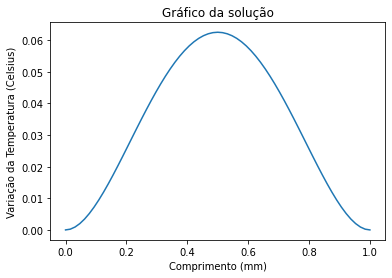

In [ ]:
#Validação
X = nos_splines(n,L) # Lista de nós

(a,b,c,d) = matriz_ritzRaleigh_calor(X,k,n,L,f) # Elementos do sistema linear

alpha = sys_tridiagonal(a,b,c,d) # Coeficientes

Y = solucao_elementosFinitos_calor(n,alpha,X,A,B) # Solução u(x)

plt.plot(X,Y)
plt.title('Gráfico da solução')
plt.xlabel('Comprimento (mm)')
plt.ylabel('Variação da Temperatura (Celsius)')

##### No código abaixo são calculados os valores da temperatura em uma dada posição definida anteriormente através do uso de splines lineares, conforme já mencionado. Assim, são obtidos os valores de temperatura oriundos tanto do código aqui desenvolvido, como da função de solução exata, tomando como referência os mesmos pontos definidos anteriormente. Feito isso, será calculado o erro e discutida essa diferença mais adiante.

In [ ]:
# Calculo do erro
Y_ideal1=[] # Lista de resultados da solução exata para n=7
Y_ideal2=[] # Lista de resultados da solução exata para n=15
Y_ideal3=[] # Lista de resultados da solução exata para n=31
Y_ideal4=[] # Lista de resultados da solução exata para n=63

X1 = nos_splines(7, L) # Lista de nós
(a,b,c,d) = matriz_ritzRaleigh_calor(X1,k,7,L,f) # Elementos do sistema linear
alpha = sys_tridiagonal(a,b,c,d) # Coeficientes
Y1 = (solucao_elementosFinitos_calor(7,alpha,X1,A,B)) # Solução u(x)
for z in range (len(X1)):
  x = X1[z] # Obtenção dos nós
  Y_ideal1.append((x**2)*((1-x)**2)) # Solução exata

X2 = nos_splines(15, L) # Lista de nós
(a,b,c,d) = matriz_ritzRaleigh_calor(X2,k,15,L,f) # Elementos do sistema linear
alpha = sys_tridiagonal(a,b,c,d) # Coeficientes
Y2 = solucao_elementosFinitos_calor(15,alpha,X2,A,B) # Solução u(x)
for z in range (len(X2)):
  x = X2[z] # Obtenção de nós
  Y_ideal2.append((x**2)*((1-x)**2)) # Solução exata

X3 = nos_splines(31, L) # Lista de nós
(a,b,c,d) = matriz_ritzRaleigh_calor(X3,k,31,L,f) # Elementos do sistema linear
alpha = sys_tridiagonal(a,b,c,d) # Coeficientes
Y3 = solucao_elementosFinitos_calor(31,alpha,X3,A,B) # Solução u(x)
for z in range (len(X3)):
  x = X3[z] # Obtenção de nós
  Y_ideal3.append((x**2)*((1-x)**2)) # Solução exata

X4 = nos_splines(63, L) # Lista de nós
(a,b,c,d) = matriz_ritzRaleigh_calor(X4,k,63,L,f) # Elementos do sistema linear
alpha = sys_tridiagonal(a,b,c,d) # Coeficientes
Y4 = solucao_elementosFinitos_calor(63,alpha,X4,A,B) # Solução u(x)
for z in range (len(X4)):
  x = X4[z] # Obtenção de nós
  Y_ideal4.append((x**2)*((1-x)**2)) # Solução exata

##### A seguir serão apresentados quatro blocos de códigos similares, cada um responsável por calcular o resultado para um dado valor de n e compará-lo com os valores obtidos através da solução exata, tomando como parâmetro os mesmos valores de x (pontos no comprimento do chip) de forma a obter a diferença (resultado do erro) em temperatura.

Erro máximo para n=7: 6.938893903907228e-18


Text(0, 0.5, 'Variação da Temperatura (Celsius)')

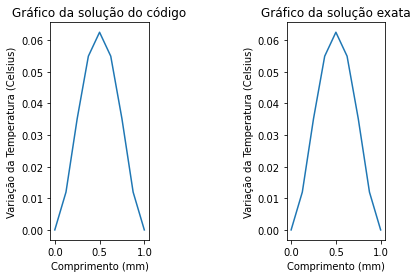

In [ ]:
#Erro absoluto máximo em n=7
Error_list = list(map(lambda v1, v2: v1 - v2, Y1, Y_ideal1))
erro=abs(max(Error_list))

print('Erro máximo para n=7:', erro)

plot1 = plt.subplot2grid((1,3),(0,0))
plot1.plot(X1,Y1)
plot1.set_title('Gráfico da solução do código')
plt.xlabel('Comprimento (mm)')
plt.ylabel('Variação da Temperatura (Celsius)')
plot2 = plt.subplot2grid((1,3),(0,2))
plot2.plot(X1,Y_ideal1)
plot2.set_title('Gráfico da solução exata')
plt.xlabel('Comprimento (mm)')
plt.ylabel('Variação da Temperatura (Celsius)')

















Erro máximo para n=15: 6.938893903907228e-18


Text(0, 0.5, 'Variação da Temperatura (Celsius)')

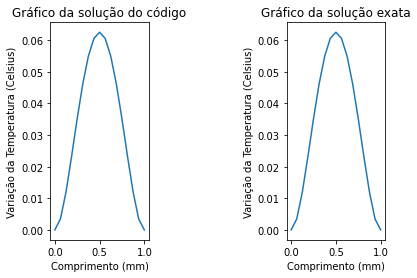

In [ ]:
#Erro absoluto máximo em n=15
Error_list = list(map(lambda v1, v2: v1 - v2, Y2, Y_ideal2))
erro=abs(max(Error_list))

print('Erro máximo para n=15:', erro)

plot1 = plt.subplot2grid((1,3),(0,0))
plot1.plot(X2,Y2)
plot1.set_title('Gráfico da solução do código')
plt.xlabel('Comprimento (mm)')
plt.ylabel('Variação da Temperatura (Celsius)')
plot2 = plt.subplot2grid((1,3),(0,2))
plot2.plot(X2,Y_ideal2)
plot2.set_title('Gráfico da solução exata')
plt.xlabel('Comprimento (mm)')
plt.ylabel('Variação da Temperatura (Celsius)')

Erro máximo para n=31: 0.0


Text(0, 0.5, 'Variação da Temperatura (Celsius)')

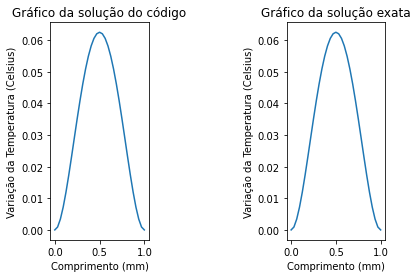

In [ ]:
#Erro absoluto máximo em n=31
Error_list = list(map(lambda v1, v2: v1 - v2, Y3, Y_ideal3))
erro=abs(max(Error_list))

print('Erro máximo para n=31:', erro)

plot1 = plt.subplot2grid((1,3),(0,0))
plot1.plot(X3,Y3)
plot1.set_title('Gráfico da solução do código')
plt.xlabel('Comprimento (mm)')
plt.ylabel('Variação da Temperatura (Celsius)')
plot2 = plt.subplot2grid((1,3),(0,2))
plot2.plot(X3,Y_ideal3)
plot2.set_title('Gráfico da solução exata')
plt.xlabel('Comprimento (mm)')
plt.ylabel('Variação da Temperatura (Celsius)')

Erro máximo para n=63: 0.0


Text(0, 0.5, 'Variação da Temperatura (Celsius)')

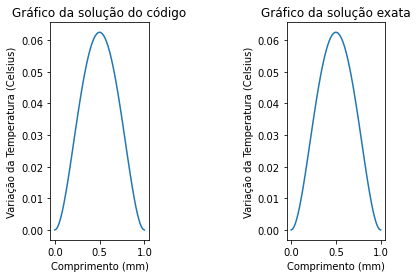

In [ ]:
#Erro absoluto máximo em n=63
Error_list = list(map(lambda v1, v2: v1 - v2, Y4, Y_ideal4))
erro=abs(max(Error_list))

print('Erro máximo para n=63:', erro)

plot1 = plt.subplot2grid((1,3),(0,0))
plot1.plot(X4,Y4)
plot1.set_title('Gráfico da solução do código')
plt.xlabel('Comprimento (mm)')
plt.ylabel('Variação da Temperatura (Celsius)')
plot2 = plt.subplot2grid((1,3),(0,2))
plot2.plot(X4,Y_ideal4)
plot2.set_title('Gráfico da solução exata')
plt.xlabel('Comprimento (mm)')
plt.ylabel('Variação da Temperatura (Celsius)')





##### Com os resultados apresentados a cima, podemos verificar que o código apresentou um desempenho eficaz para essa primeira situação, tendo os valores máximos de erros situados nas condições de n=7 e n=15, onde o valor absoluto obtido do erro foi de aproximadamente 7,00E-18ºC, um valor extremamente pequeno, mas diferente de 0, esse erro já era esperado visto que a quantidade limitada de pontos proporcionam menor precisão da aproximação em relação ao resultado esperado pela função de solução exata.
##### Já os resultados para os demais valores de n, 31 e 63, tiveram erro 0, portanto, para os pontos calculados não houveram desvios de temperatura em comparação com a função da solução exata para esse problema.

####Segundo Teste
O segundo teste de validação a ser realizado, considera as condições de fronteira homogêneas assim como o primeiro, portanto A e B serão iguais a 0, o comprimento será igual a 1,enquanto a condutibilidade do material é considerada corresponde a uma função k(x) e a fonte de calor é representada por outra função f(x), conforme representado a seguir: $$k(x)=e^x\\f(x)=e^x+1$$

In [ ]:
#Valores de Validação
k = lambda x: math.exp(x)

f = lambda x: math.exp(x)+1

A = 0
B = 0

n = 63

L=1

##### O código de validação propriamente dito, assim como o que foi descrito no primeiro teste, consiste em chamar as funções, para os valores paresentados anteriormente, facilitando assim a alteração dos valores e as diferentes análises, quando for necessário. Entretanto, para o caso aqui demonstrado estão sendo utilizados os parâmetros propostos na primeira etapa de validação do código disponilizada no enunciado do EP3.

Text(0, 0.5, 'Variação da Temperatura (Celsius)')

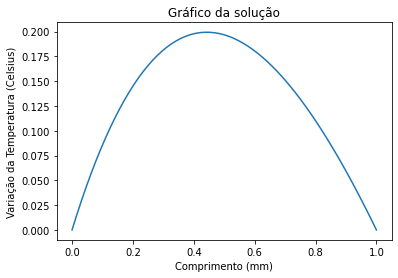

In [ ]:
#Validação
X = nos_splines(n,L) # Lista de nós

(a,b,c,d) = matriz_ritzRaleigh_calor(X,k,n,L,f) # Elementos do sistema linear

alpha = sys_tridiagonal(a,b,c,d) # Coeficientes

Y = solucao_elementosFinitos_calor(n,alpha,X,A,B) # Solução u(x)

plt.plot(X,Y)
plt.title('Gráfico da solução')
plt.xlabel('Comprimento (mm)')
plt.ylabel('Variação da Temperatura (Celsius)')

##### No código abaixo são calculados os valores da temperatura em uma dada posição definida anteriormente através do uso de splines lineares, conforme já mencionado. Assim, são obtidos os valores de temperatura oriundos tanto do código aqui desenvolvido, como da função de solução exata, tomando como referência os mesmos pontos definidos anteriormente. Feito isso, será calculado o erro e discutida essa diferença mais adiante.

In [ ]:
# Calculo do erro
Y_ideal1=[] # Lista de resultados da solução exata para n=7
Y_ideal2=[] # Lista de resultados da solução exata para n=15
Y_ideal3=[] # Lista de resultados da solução exata para n=31
Y_ideal4=[] # Lista de resultados da solução exata para n=63

X1 = nos_splines(7, L) # Lista de nós
(a,b,c,d) = matriz_ritzRaleigh_calor(X1,k,7,L,f) # Elementos do sistema linear
alpha = sys_tridiagonal(a,b,c,d) # Coeficientes
Y1 = (solucao_elementosFinitos_calor(7,alpha,X1,A,B)) # Solução u(x)
for z in range (len(X1)):
  x = X1[z] # Obtenção dos nós
  Y_ideal1.append((x-1)*((np.exp(-x))-1)) # Solução exata

X2 = nos_splines(15, L) # Lista de nós
(a,b,c,d) = matriz_ritzRaleigh_calor(X2,k,15,L,f) # Elementos do sistema linear
alpha = sys_tridiagonal(a,b,c,d) # Coeficientes
Y2 = solucao_elementosFinitos_calor(15,alpha,X2,A,B) # Solução u(x)
for z in range (len(X2)):
  x = X2[z] # Obtenção dos nós
  Y_ideal2.append((x-1)*((np.exp(-x))-1)) # Solução exata

X3 = nos_splines(31, L) # Lista de nós
(a,b,c,d) = matriz_ritzRaleigh_calor(X3,k,31,L,f) # Elementos do sistema linear
alpha = sys_tridiagonal(a,b,c,d) # Coeficientes
Y3 = solucao_elementosFinitos_calor(31,alpha,X3,A,B) # Solução u(x)
for z in range (len(X3)):
  x = X3[z] # Obtenção dos nós
  Y_ideal3.append((x-1)*((np.exp(-x))-1)) # Solução exata

X4 = nos_splines(63, L) # Lista de nós
(a,b,c,d) = matriz_ritzRaleigh_calor(X4,k,63,L,f) # Elementos do sistema linear
alpha = sys_tridiagonal(a,b,c,d) # Coeficientes
Y4 = solucao_elementosFinitos_calor(63,alpha,X4,A,B) # Solução u(x)
for z in range (len(X4)):
  x = X4[z] # Obtenção dos nós
  Y_ideal4.append((x-1)*((np.exp(-x))-1)) # Solução exata

##### A seguir, novamente como no primeiro teste, serão apresentados quatro blocos de códigos similares, cada um responsável por calcular o resultado para um dado valor de n e compará-lo com os valores obtidos através da solução exata, tomando como parâmetro os mesmos valores de x (pontos no comprimento do chip) de forma a obter a diferença (resultado do erro) em temperatura.

Erro máximo para n=7: 0.0


Text(0, 0.5, 'Variação da Temperatura (Celsius)')

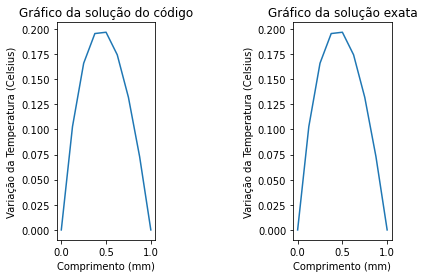

In [ ]:
#Erro absoluto máximo em n=7
Error_list = list(map(lambda v1, v2: v1 - v2, Y1, Y_ideal1))
erro=abs(max(Error_list))

print('Erro máximo para n=7:', erro)

plot1 = plt.subplot2grid((1,3),(0,0))
plot1.plot(X1,Y1)
plot1.set_title('Gráfico da solução do código')
plt.xlabel('Comprimento (mm)')
plt.ylabel('Variação da Temperatura (Celsius)')
plot2 = plt.subplot2grid((1,3),(0,2))
plot2.plot(X1,Y_ideal1)
plot2.set_title('Gráfico da solução exata')
plt.xlabel('Comprimento (mm)')
plt.ylabel('Variação da Temperatura (Celsius)')

Erro máximo para n=15: 0.0


Text(0, 0.5, 'Variação da Temperatura (Celsius)')

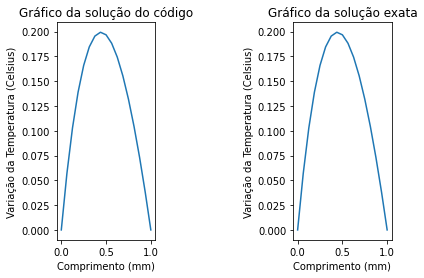

In [ ]:
#Erro absoluto máximo em n=15
Error_list = list(map(lambda v1, v2: v1 - v2, Y2, Y_ideal2))
erro=abs(max(Error_list))

print('Erro máximo para n=15:', erro)

plot1 = plt.subplot2grid((1,3),(0,0))
plot1.plot(X2,Y2)
plot1.set_title('Gráfico da solução do código')
plt.xlabel('Comprimento (mm)')
plt.ylabel('Variação da Temperatura (Celsius)')
plot2 = plt.subplot2grid((1,3),(0,2))
plot2.plot(X2,Y_ideal2)
plot2.set_title('Gráfico da solução exata')
plt.xlabel('Comprimento (mm)')
plt.ylabel('Variação da Temperatura (Celsius)')















Erro máximo para n=31: 0.0


Text(0, 0.5, 'Variação da Temperatura (Celsius)')

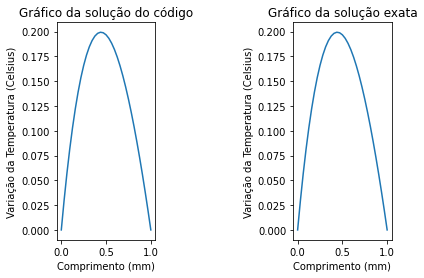

In [ ]:
#Erro absoluto máximo em n=31
Error_list = list(map(lambda v1, v2: v1 - v2, Y3, Y_ideal3))
erro=abs(max(Error_list))

print('Erro máximo para n=31:', erro)

plot1 = plt.subplot2grid((1,3),(0,0))
plot1.plot(X3,Y3)
plot1.set_title('Gráfico da solução do código')
plt.xlabel('Comprimento (mm)')
plt.ylabel('Variação da Temperatura (Celsius)')
plot2 = plt.subplot2grid((1,3),(0,2))
plot2.plot(X3,Y_ideal3)
plot2.set_title('Gráfico da solução exata')
plt.xlabel('Comprimento (mm)')
plt.ylabel('Variação da Temperatura (Celsius)')

Erro máximo para n=63: 0.0


Text(0, 0.5, 'Variação da Temperatura (Celsius)')

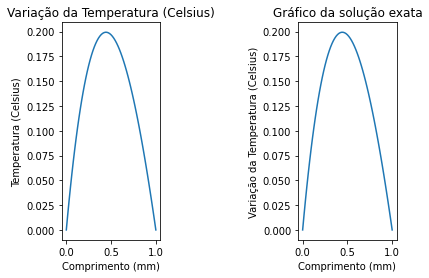

In [ ]:
#Erro absoluto máximo em n=63
Error_list = list(map(lambda v1, v2: v1 - v2, Y4, Y_ideal4))
erro=abs(max(Error_list))

print('Erro máximo para n=63:', erro)

plot1 = plt.subplot2grid((1,3),(0,0))
plot1.plot(X4,Y4)
plot1.set_title('Variação da Temperatura (Celsius)')
plt.xlabel('Comprimento (mm)')
plt.ylabel('Temperatura (Celsius)')
plot2 = plt.subplot2grid((1,3),(0,2))
plot2.plot(X4,Y_ideal4)
plot2.set_title('Gráfico da solução exata')
plt.xlabel('Comprimento (mm)')
plt.ylabel('Variação da Temperatura (Celsius)')

##### Diferentemente dos resultados obtidos no primeiro teste, o segundo teste resultou em todos os erros iguais a zero quando considerado um mesmo ponto do comprimento do chip a ser analisado. Assim, podemos concluir que o código demonstrou um desempenho eficaz para a dada aplicação, fornecendo resultados condizentes com o esperado, tendo essa afirmação embasada principalmente nas funções de solução exata fornecidas pelo próprio enunciado do Exercício Prático 3.

##Equilíbrio com forças de calor

Assumindo que o chip esquenta mais na parte central do chip, o calor gerado pelo chip foi modelado segundo a seguinte gaussiana:

\begin{align}
Q_+(x) = Q_+^0 e^{-(x-L/2)^2/σ^2}, 
\end{align}

Na qual:


*   $Q_+^0$ é o calor máximo gerado no centro do chip;
*   σ é uma constante que controla a variação de calor;

Já o resfriamento imposto pelo "cooler" pode ser modelado de maneira similar, mas o considerando mais intenso próximo às extremidades:

\begin{align}
Q_-(x) = Q_-^0 (e^{-(x)^2/θ^2}+e^{-(x-L)^2/θ^2})
\end{align}

Na qual,

*   $Q_-^0$ é o resfriamento máximo nas extremidades do chip;
*   θ é uma constante que controla a variação do resfriamento;

A influência desses parâmetros sobre a difusão térmica no chip será discutida mais adiante.

In [ ]:
# Teste base, alterar variáveis

QZERO_POS = 5  # Calor máximo gerado
QZERO_NEG = 10  # Resfriamento máximo
L = 1 # Comprimento (mm)
sigma = 15 # Constante de variação do calor
theta = 20 # Constante de variação do resfriamento

k = lambda x: 0.0036 # W/(mmK)

QPOS = lambda x: QZERO_POS * math.exp(-(x-L/2)**2/(sigma)**2) # Função do calor gerado

QNEG = lambda x: QZERO_NEG * (math.exp(-(x)**2/(theta)**2)+math.exp(-(x-L)**2/(theta)**2)) 
# Função do resfriamento

f = lambda x: QPOS(x) + QNEG(x) # Função do calor

# Condições de fronteira
A = 20
B = 20

n = 63 # n+2 nós

#### Primeiro Caso
##### Tomando o teste base, com valores aleatórios como parâmetros, é realizada a aplicação do método de elementos finitos para calor gerado e resfriamento constantes, iguais respectivamente a 5 e 10, tendo esses valores como os responsáveis por definir a função f através da sua diferença, conforme já mencionado no desenvolvimento desse relatório. Além disso, esse caso considerar condições de fronteiras não homogêneas tendo ambas iguais a 20ºC. Definidos os parâmetros é feito o mesmo procedimento para a aplicação das funções com o intuito de obter a solução de distribuição da temperatura ao longo do comprimento do chip.

In [ ]:
# Primeiro Caso: Calor Gerado e Resfriamento constantes

QZERO_POS = 5 # Calor máximo gerado
QZERO_NEG = 10 # Resfriamento máximo
L = 1 # Comprimento (mm)

k = lambda x: 0.0036 # W/(mmK)

QPOS = lambda x: QZERO_POS # Função do calor gerado

QNEG = lambda x: QZERO_NEG # Função do resfriamento

f = lambda x: QPOS(x) + QNEG(x) # Função do calor

# Condições de fronteira
A = 20
B = 20

n = 63 # n+2 nós

##### O código abaixo, assim como na etapa de validação, tem o propósito de chamar as funções responsáveis por constituir o processo de elementos finitos com o objetivo de obter a temperatura em determinados pontos do chip.

Text(0, 0.5, 'Temperatura (Celsius)')

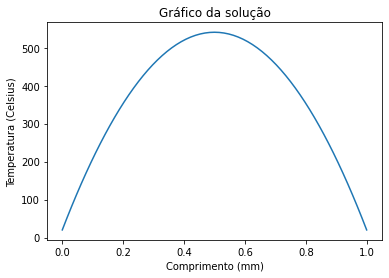

In [ ]:
X = nos_splines(n,L) # Lista de nós

(a,b,c,d) = matriz_ritzRaleigh_calor(X,k,n,L,f) # Elementos do sistema linear

alpha = sys_tridiagonal(a,b,c,d) # Coeficientes

Y = solucao_elementosFinitos_calor(n,alpha,X,A,B) # Solução u(x)

plt.plot(X,Y)
plt.title('Gráfico da solução')
plt.xlabel('Comprimento (mm)')
plt.ylabel('Temperatura (Celsius)')

##### O resultado obtido é diferente do primeiro teste de validação, mesmo utilizando os mesmos valores de k, l e n, pois a função correspondente a f(x) e as condições de fronteira são diferentes. A principal mudança persepitível ocasionada pela condição de fronteira é que a temperatura em x=0 e x=1 são correspondentes às temperaturas da fronteira A e B respectivamente. Já, a alteração referente a função f(x) fica evidente no formato da curva do gráfico que apresenta derivadas menos acentuadas do que o gráfico obtido no primeiro teste, nos pontos intermediários entre o pico e as extremidades.

#### Segundo Caso
##### O segundo caso por sua vez, também toma o teste base como parâmetro, mas dessa vez altera as constantes e as funções presentes nele tendo como intuito obter o resultado de elementos finitos para uma condição diferente da situação genérica exposta no caso anterior. Para isso são definidos diferentes valores de calor máximo gerado no centro do chip, resfriamento máximo nas extremidades do chip, e diferentes constantes do controle da variação do calor e do resfriamento.
##### Para esse caso em específico, são definidos os valores referentes ao calor máximo e resfriamento máximo de 70 e 60 respectivamente, assim como seus coeficientes sigma e theta que correspondem aos valores de 0.05 e 0.7, respectivamente. Além disso, a condutibilidade térmica é mantida constante, considerando o material como sílicio e as condições de fronteiras não homôgeneas recebem os valores 20 e 21.4, sendo A e B definidas, respectivamente.

In [ ]:
# Segundo Caso: Parâmetros aleatórios

QZERO_POS = 70 # Calor máximo gerado
QZERO_NEG = 60 # Resfriamento máximo
L = 1 # Comprimento (mm)
sigma = 0.05 # Constante de variação do calor
theta = 0.7 # Constante de variação do resfriamento

k = lambda x: 0.036 # W/(mmK)

QPOS = lambda x: QZERO_POS * math.exp(-(x-L/2)**2/(sigma)**2) # Função do calor gerado

QNEG = lambda x: QZERO_NEG * (math.exp(-(x)**2/(theta)**2)+math.exp(-(x-L)**2/(theta)**2)) 
# Função do resfriamento

f = lambda x: QPOS(x) + QNEG(x) # Função do calor

# Condições de fronteira
A = 20
B = 21.4

n = 63 # n+2 nós

##### Assim como no primeiro caso e na etapa de validação, código abaixo tem o propósito de chamar as funções responsáveis por constituir o processo de elementos finitos com o objetivo de obter a temperatura em determinados pontos do chip.

Text(0, 0.5, 'Temperatura (Celsius)')

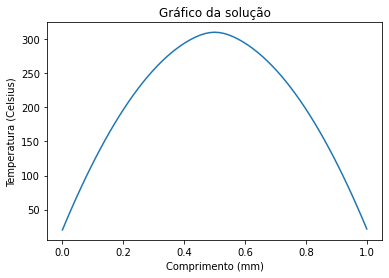

In [ ]:
X = nos_splines(n,L) # Lista de nós

(a,b,c,d) = matriz_ritzRaleigh_calor(X,k,n,L,f) # Elementos do sistema linear

alpha = sys_tridiagonal(a,b,c,d) # Coeficientes

Y = solucao_elementosFinitos_calor(n,alpha,X,A,B) # Solução u(x)

plt.plot(X,Y)
plt.title('Gráfico da solução')
plt.xlabel('Comprimento (mm)')
plt.ylabel('Temperatura (Celsius)')

##### Assim como mencionado no primeiro caso, o segundo caso também possuí diferenças, tanto nas condições de fronteira não homogêneas, como no formato da curva de distribuição da temperatura ao longo dos pontos analisados. Nesse caso, a condição de fronteira A permanece igual ao do caso anteriormente analisado, já a condição B possuí uma temperatura de 21.4ºC, enquanto o formato da curva em comparação com o obtido no primeiro teste de validação, tem uma caracterização similar a descrita no primeiro caso analisado nessa etapa de variação da distribuição de calor ao longo do comprimento do chip.

###Estudo dos parâmetros da Gaussiana do Calor Gerado

O calor emanado em um comprimento do chip pode ser aproximado pela fórmula $Q_+
 = P/V$ na qual P é a potência e V é o volume do chip. Dessa forma, pode-se determinar, de maneira iterativa, diferentes parâmetros para a gaussiana para que a integral dessa tenha esse mesmo valor. 

Tomam-se 3 casos para análise: 1) o calor gerado é quase todo concentrado no centro, 2) o calor é melhor distriuído, mas ainda se concentra principalmente na parte central, e 3) o calor é bem distribuído. Esses casos são obtidos ao variarmos $σ$.
 
Por exemplo, para um chip com potência P = 30 W e dimensões L = 20 mm e h = 2 mm o calor total gerado será $0,375 W/mm^3$.

In [ ]:
# 1) Para uma geração de calor muito concentrada (sigma pequeno)

QZERO_POS = 44.95 
sigma = 0.5
L = 20 # mm
QPOS = lambda x: QZERO_POS * math.exp(-(x-(L/2))**2/(sigma)**2)

In [ ]:
integrate_gaussian(10,QPOS,0,L) # Calor total gerado W/mm^3

0.0375099534766376

Text(0, 0.5, 'Calor Gerado (W/mm^3)')

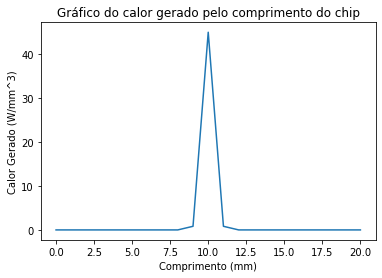

In [ ]:
# Gráfico do calor gerado pelo comprimento do chip
x=[] # Comprimento
y=[] # Calor
for i in range(0,int(L)+1):
  x.append(i)
  y.append(QPOS(x[i]))

plt.plot(x,y)
plt.title('Gráfico do calor gerado pelo comprimento do chip')
plt.xlabel('Comprimento (mm)')
plt.ylabel('Calor Gerado (W/mm^3)')

In [ ]:
# 2) Para uma geração de calor com uma distribuição média no chip (sigma médio)

QZERO_POS = 0.00529
sigma = 4
L = 20 # mm
QPOS = lambda x: QZERO_POS * math.exp(-(x-(L/2))**2/(sigma)**2)

In [ ]:
integrate_gaussian(10,QPOS,0,L)  # Calor total gerado W/mm^3

0.037489617301499856

Text(0, 0.5, 'Calor Gerado (W/mm^3)')

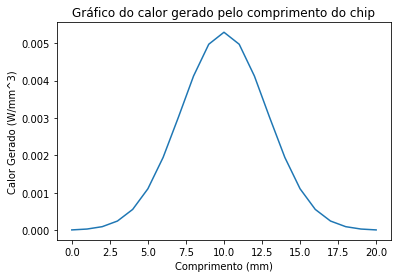

In [ ]:
# Gráfico do calor gerado pelo comprimento do chip
x=[] # Comprimento
y=[] # Calor
for i in range(0,int(L)+1):
  x.append(i)
  y.append(QPOS(x[i]))
  
plt.plot(x,y)
plt.title('Gráfico do calor gerado pelo comprimento do chip')
plt.xlabel('Comprimento (mm)')
plt.ylabel('Calor Gerado (W/mm^3)')









In [ ]:
# 3) Para uma geração de calor muito distribuída (sigma alto)

QZERO_POS = 0.002033
sigma = 20
L = 20 # mm
QPOS = lambda x: QZERO_POS * math.exp(-(x-(L/2))**2/(sigma)**2)

In [ ]:
integrate_gaussian(10,QPOS,0,L)  # Calor total gerado W/mm^3

0.037511371441488285

Text(0, 0.5, 'Calor Gerado (W/mm^3)')

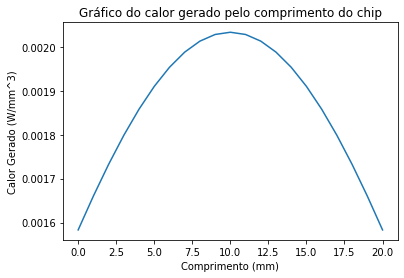

In [ ]:
# Gráfico do calor gerado pelo comprimento do chip
x=[] # Comprimento
y=[] # Calor
for i in range(0,int(L)+1):
  x.append(i)
  y.append(QPOS(x[i]))

plt.plot(x,y)
plt.title('Gráfico do calor gerado pelo comprimento do chip')
plt.xlabel('Comprimento (mm)')
plt.ylabel('Calor Gerado (W/mm^3)')

Agora vamos fazer a mesma análise para o Processador Intel Core i5-9400F:

*   Potência: 65 W
*   L = 37,5 ≃ 38 mm
*   h = 1 mm (valor não encontrado)

Portanto, $Q_+$ = 0.0462 $W/mm^3$

In [ ]:
# 1) Para uma geração de calor muito concentrada (sigma pequeno)

QZERO_POS = 80.2
sigma = 0.9
L = 38 # mm
QPOS = lambda x: QZERO_POS * math.exp(-(x-(L/2))**2/(sigma)**2)

In [ ]:
integrate_gaussian(10,QPOS,0,L) # Calor total gerado W/mm^3

0.04620199739258157

Text(0, 0.5, 'Calor Gerado (W/mm^3)')

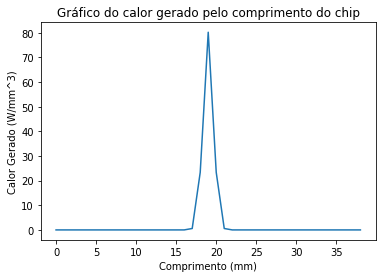

In [ ]:
# Gráfico do calor gerado pelo comprimento do chip
x=[] # Comprimento
y=[] # Calor
for i in range(0,int(L)+1):
  x.append(i)
  y.append(QPOS(x[i]))

plt.plot(x,y)
plt.title('Gráfico do calor gerado pelo comprimento do chip')
plt.xlabel('Comprimento (mm)')
plt.ylabel('Calor Gerado (W/mm^3)')

In [ ]:
# 2) Para uma geração de calor com uma distribuição média no chip (sigma médio)

QZERO_POS = 0.00372
sigma = 7
L = 38 # mm
QPOS = lambda x: QZERO_POS * math.exp(-(x-(L/2))**2/(sigma)**2)

In [ ]:
integrate_gaussian(10,QPOS,0,L) # Calor total gerado W/mm^3

0.046147915333350026

Text(0, 0.5, 'Calor Gerado (W/mm^3)')

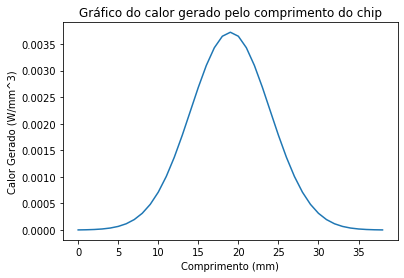

In [ ]:
# Gráfico do calor gerado pelo comprimento do chip
x=[] # Comprimento
y=[] # Calor
for i in range(0,int(L)+1):
  x.append(i)
  y.append(QPOS(x[i]))

plt.plot(x,y)
plt.title('Gráfico do calor gerado pelo comprimento do chip')
plt.xlabel('Comprimento (mm)')
plt.ylabel('Calor Gerado (W/mm^3)')

In [ ]:
# 3) Para uma geração de calor muito distribuída (sigma alto)

QZERO_POS = 0.00159
sigma = 20
L = 38 # mm
QPOS = lambda x: QZERO_POS * math.exp(-(x-(L/2))**2/(sigma)**2)

In [ ]:
integrate_gaussian(10,QPOS,0,L) # Calor total gerado W/mm^3

0.046268716106272104

Text(0, 0.5, 'Calor Gerado (W/mm^3)')

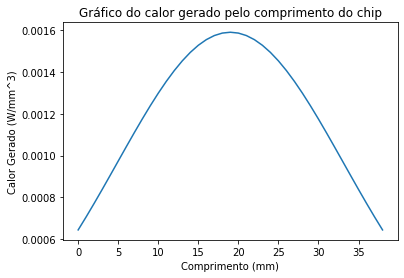

In [ ]:
# Gráfico do calor gerado pelo comprimento do chip
x=[] # Comprimento
y=[] # Calor
for i in range(0,int(L)+1):
  x.append(i)
  y.append(QPOS(x[i]))

plt.plot(x,y)
plt.title('Gráfico do calor gerado pelo comprimento do chip')
plt.xlabel('Comprimento (mm)')
plt.ylabel('Calor Gerado (W/mm^3)')

















###Estudo dos parâmetros da Gaussiana do Calor Retirado

A análise é feita de maneira similar a anterior, a principal diferença se encontra no fato de o calor retirado se concentrar nas extremidades e não no centro. Por isso, nos concentramos em estudar apenas os parâmetros considerando $Q_-$ = $Q_+$ = 0.0462 $W/mm^3$ para o processador anterior.

As diferentes relações entre  $Q_-$ e $Q_+$ serão exploradas mais adiante para a análise da temperatura no chip.

In [ ]:
# 1) Resfriamento concentrado

QZERO_NEG = 90.1
L = 38 # mm
theta = 0.17
QNEG = lambda x: QZERO_NEG * (math.exp(-(x)**2/(theta)**2) + math.exp(-(x-L)**2/(theta)**2))

In [ ]:
integrate_gaussian(10,QNEG,0,L) # Calor total retirado W/mm^3

0.046215061965010504

Text(0, 0.5, 'Calor Retirado (W/mm^3)')

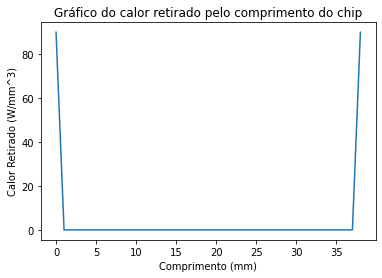

In [ ]:
# Gráfico do calor retirado pelo comprimento do chip
x=[] # Comprimento
y=[] # Calor

for i in range(0,int(L)+1):
  x.append(i)
  y.append(QNEG(x[i]))

plt.plot(x,y)
plt.title('Gráfico do calor retirado pelo comprimento do chip')
plt.xlabel('Comprimento (mm)')
plt.ylabel('Calor Retirado (W/mm^3)')

In [ ]:
# 2) Resfriamento com distribuição média pelo comprimento

QZERO_NEG = 0.00372
L = 38 # mm
theta = 7
QNEG = lambda x: QZERO_NEG * (math.exp(-(x)**2/(theta)**2) + math.exp(-(x-L)**2/(theta)**2))

In [ ]:
integrate_gaussian(10,QNEG,0,L) # Calor total retirado W/mm^3

0.0461547614540736

Text(0, 0.5, 'Calor Retirado (W/mm^3)')

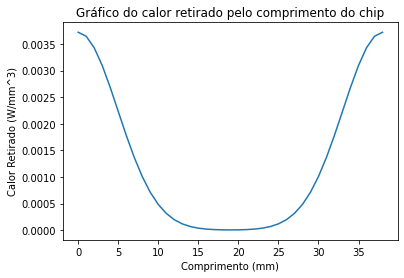

In [ ]:
# Gráfico do calor retirado pelo comprimento do chip
x=[] # Comprimento
y=[] # Calor

for i in range(0,int(L)+1):
  x.append(i)
  y.append(QNEG(x[i]))

plt.plot(x,y)
plt.title('Gráfico do calor retirado pelo comprimento do chip')
plt.xlabel('Comprimento (mm)')
plt.ylabel('Calor Retirado (W/mm^3)')












In [ ]:
# 3) Resfriamento com grande distribuição

QZERO_NEG = 0.001313
L = 38 # mm
theta = 20
QNEG = lambda x: QZERO_NEG * (math.exp(-(x)**2/(theta)**2) + math.exp(-(x-L)**2/(theta)**2))

In [ ]:
integrate_gaussian(10,QNEG,0,L) # Calor total retirado W/mm^3

0.046209071262493136

Text(0, 0.5, 'Calor Retirado (W/mm^3)')

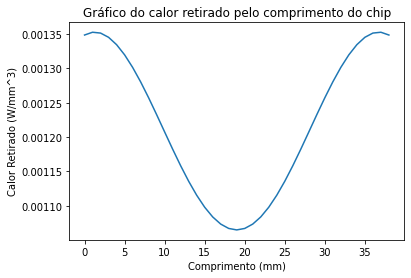

In [ ]:
# Gráfico do calor retirado pelo comprimento do chip
x=[] # Comprimento
y=[] # Calor

for i in range(0,int(L)+1):
  x.append(i)
  y.append(QNEG(x[i]))

plt.plot(x,y)
plt.title('Gráfico do calor retirado pelo comprimento do chip')
plt.xlabel('Comprimento (mm)')
plt.ylabel('Calor Retirado (W/mm^3)')
















Observa-se que para os casos com parâmetros de distribuição altos, as curvas de calor tanto gerado como retirado possuem comportamentos similares.

###Análise da influência da diferentes distribuições de calor na temperatura do chip
Serão utilizados os parâmetros determinados de forma iterativa nas duas seções anteriores para então analisarmos o comportamento da temperatura no Processador Intel Core i5-9400F.

In [ ]:
# Caso 1: Calor Gerado: Muito Concentrado 
#         Calor Retirado: Muito Concentrado 

QZERO_POS = 80.2 # Calor máximo gerado
QZERO_NEG = 90.1 # Resfriamento Máximo
L = 38 # Comprimento (mm)
sigma = 0.9 # Constante de variação do calor 
theta = 0.17 # Constante de variação do resfriamento

k = lambda x: 0.0036 # W/(mmK)

QPOS = lambda x: QZERO_POS * math.exp(-(x-L/2)**2/(sigma)**2) # Função do calor gerado

QNEG = lambda x: QZERO_NEG * (math.exp(-(x)**2/(theta)**2)+math.exp(-(x-L)**2/(theta)**2)) 
# Função do resfriamento

f = lambda x: QPOS(x) - QNEG(x) # Função do calor

# Condições de fronteira
A = 20
B = 20

n = 63 # n+2 nós

Text(0, 0.5, 'Temperatura (Celsius)')

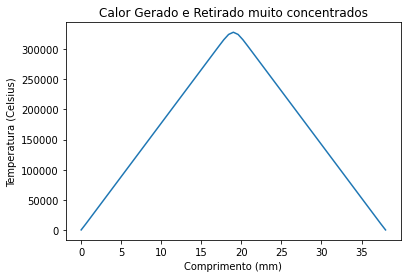

In [ ]:
X = nos_splines(n,L) # Lista de nós

(a,b,c,d) = matriz_ritzRaleigh_calor(X,k,n,L,f) # Elementos do sistema linear

alpha = sys_tridiagonal(a,b,c,d) # Coeficientes

Y = solucao_elementosFinitos_calor(n,alpha,X,A,B) # Solução u(x)

plt.plot(X,Y)
plt.title('Calor Gerado e Retirado muito concentrados')
plt.xlabel('Comprimento (mm)')
plt.ylabel('Temperatura (Celsius)')

In [ ]:
# Caso 2: Calor Gerado: Muito Concentrado 
#         Calor Retirado: Distribuição Média 

QZERO_POS = 80.2 # Calor máximo gerado
QZERO_NEG = 0.00372 # Resfriamento Máximo
L = 38 # Comprimento (mm)
sigma = 0.9 # Constante de variação do calor 
theta = 7 # Constante de variação do resfriamento

k = lambda x: 0.0036 # W/(mmK)

QPOS = lambda x: QZERO_POS * math.exp(-(x-L/2)**2/(sigma)**2) # Função do calor gerado

QNEG = lambda x: QZERO_NEG * (math.exp(-(x)**2/(theta)**2)+math.exp(-(x-L)**2/(theta)**2)) 
# Função do resfriamento

f = lambda x: QPOS(x) - QNEG(x) # Função do calor


# Condições de fronteira
A = 20
B = 20


n = 63 # n+2 nós

Text(0, 0.5, 'Temperatura (Celsius)')

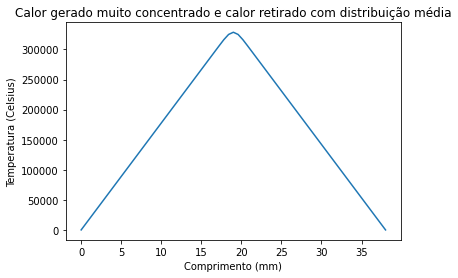

In [ ]:
X = nos_splines(n,L) # Lista de nós

(a,b,c,d) = matriz_ritzRaleigh_calor(X,k,n,L,f) # Elementos do sistema linear

alpha = sys_tridiagonal(a,b,c,d) # Coeficientes

Y = solucao_elementosFinitos_calor(n,alpha,X,A,B) # Solução u(x)

plt.plot(X,Y)
plt.title('Calor gerado muito concentrado e calor retirado com distribuição média')
plt.xlabel('Comprimento (mm)')
plt.ylabel('Temperatura (Celsius)')

In [ ]:
# Caso 3: Calor Gerado: Muito Concentrado 
#         Calor Retirado: Distribuição Alta 

QZERO_POS = 80.2 # Calor máximo gerado
QZERO_NEG = 0.001313 # Resfriamento Máximo
L = 38 # Comprimento (mm)
sigma = 0.9 # Constante de variação do calor
theta = 20 # Constante de variação do resfriamento

k = lambda x: 0.0036 # W/(mmK)

QPOS = lambda x: QZERO_POS * math.exp(-(x-L/2)**2/(sigma)**2) # Função do calor gerado

QNEG = lambda x: QZERO_NEG * (math.exp(-(x)**2/(theta)**2)+math.exp(-(x-L)**2/(theta)**2)) 
# Função do resfriamento

f = lambda x: QPOS(x) - QNEG(x) # Função do calor

# Condições de fronteira
A = 20
B = 20

n = 63 # n+2 nós

Text(0, 0.5, 'Temperatura (Celsius)')

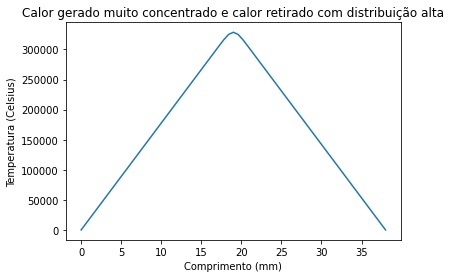

In [ ]:
X = nos_splines(n,L) # Lista de nós

(a,b,c,d) = matriz_ritzRaleigh_calor(X,k,n,L,f) # Elementos do sistema linear

alpha = sys_tridiagonal(a,b,c,d) # Coeficientes

Y = solucao_elementosFinitos_calor(n,alpha,X,A,B) # Solução u(x)

plt.plot(X,Y)
plt.title('Calor gerado muito concentrado e calor retirado com distribuição alta')
plt.xlabel('Comprimento (mm)')
plt.ylabel('Temperatura (Celsius)')

Observa-se a dominância de calor gerado concentrado sobre qualquer distribuição de resfriamento. Este configura o pior cenário, em que o cooler não possui nenhuma forma de resfiar o chip, porém evidentemente não é o que ocorre na prática e portanto não nos interessa validar um modelo em que o calor gerado se concentra praticamente em um único ponto.

In [ ]:
# Caso 4: Calor Gerado: Distribuição Média
#         Calor Retirado: Muito Concentrado 

QZERO_POS = 0.00372 # Calor máximo gerado
QZERO_NEG = 90.1 # Resfriamento Máximo
L = 38 # Comprimento (mm)
sigma = 7 # Constante de variação do calor
theta = 0.17 # Constante de variação do resfriamento

k = lambda x: 0.0036 # W/(mmK)

QPOS = lambda x: QZERO_POS * math.exp(-(x-L/2)**2/(sigma)**2) # Função do calor gerado

QNEG = lambda x: QZERO_NEG * (math.exp(-(x)**2/(theta)**2)+math.exp(-(x-L)**2/(theta)**2)) 
# Função do resfriamento

f = lambda x: QPOS(x) - QNEG(x) # Função do calor

# Condições de fronteira
A = 20
B = 20

n = 63 # n+2 nós

Text(0, 0.5, 'Temperatura (Celsius)')

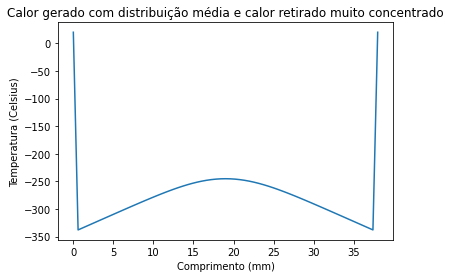

In [ ]:
X = nos_splines(n,L) # Lista de nós

(a,b,c,d) = matriz_ritzRaleigh_calor(X,k,n,L,f) # Elementos do sistema linear

alpha = sys_tridiagonal(a,b,c,d) # Coeficientes

Y = solucao_elementosFinitos_calor(n,alpha,X,A,B) # Solução u(x)

plt.plot(X,Y)
plt.title('Calor gerado com distribuição média e calor retirado muito concentrado')
plt.xlabel('Comprimento (mm)')
plt.ylabel('Temperatura (Celsius)')

In [ ]:
# Caso 5: Calor Gerado: Distribuição Média 
#         Calor Retirado: Distribuição Média 

QZERO_POS = 0.00372 # Calor máximo gerado
QZERO_NEG = 0.00372 # Resfriamento máximo
L = 38 # Comprimento (mm)
sigma = 7 # Constante de variação do calor
theta = 7 # Constante de variação do resfriamento
k = lambda x: 0.0036 # W/(mmK)

QPOS = lambda x: QZERO_POS * math.exp(-(x-L/2)**2/(sigma)**2) # Função do calor gerado


QNEG = lambda x: QZERO_NEG * (math.exp(-(x)**2/(theta)**2)+math.exp(-(x-L)**2/(theta)**2)) 
# Função do resfriamento

f = lambda x: QPOS(x) - QNEG(x) # Função do calor

# Condições de fronteira
A = 20
B = 20

n = 63 # n+2 nós

Text(0, 0.5, 'Temperatura (Celsius)')

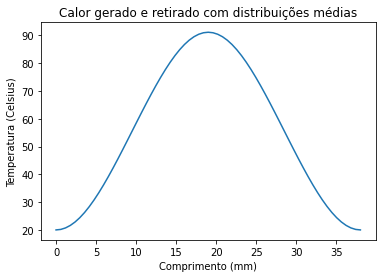

In [ ]:
X = nos_splines(n,L) # Lista de nós

(a,b,c,d) = matriz_ritzRaleigh_calor(X,k,n,L,f) # Elementos do sistema linear

alpha = sys_tridiagonal(a,b,c,d) # Coeficientes

Y = solucao_elementosFinitos_calor(n,alpha,X,A,B) # Solução u(x)

plt.plot(X,Y)
plt.title('Calor gerado e retirado com distribuições médias')
plt.xlabel('Comprimento (mm)')
plt.ylabel('Temperatura (Celsius)')

In [ ]:
# Caso 6: Calor Gerado: Distribuição Média 
#         Calor Retirado: Distribuição Alta 

QZERO_POS = 0.00372 # Calor máximo gerado
QZERO_NEG = 0.001313 # Resfriamento máximo
L = 38 # Comprimento (mm)
sigma = 7 # Constante de variação do calor
theta = 20 # Constante de variação do resfriamento
k = lambda x: 0.0036 # W/(mmK)

QPOS = lambda x: QZERO_POS * math.exp(-(x-L/2)**2/(sigma)**2) # Função do calor gerado


QNEG = lambda x: QZERO_NEG * (math.exp(-(x)**2/(theta)**2)+math.exp(-(x-L)**2/(theta)**2)) 
# Função do resfriamento

f = lambda x: QPOS(x) - QNEG(x) # Função do calor

# Condições de fronteira
A = 20
B = 20

n = 63 # n+2 nós

Text(0, 0.5, 'Temperatura (Celsius)')

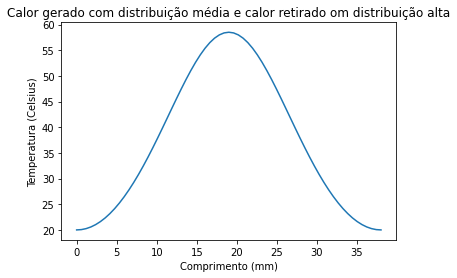

In [ ]:
X = nos_splines(n,L) # Lista de nós

(a,b,c,d) = matriz_ritzRaleigh_calor(X,k,n,L,f) # Elementos do sistema linear

alpha = sys_tridiagonal(a,b,c,d) # Coeficientes

Y = solucao_elementosFinitos_calor(n,alpha,X,A,B) # Solução u(x)

plt.plot(X,Y)
plt.title('Calor gerado com distribuição média e calor retirado om distribuição alta')
plt.xlabel('Comprimento (mm)')
plt.ylabel('Temperatura (Celsius)')

In [ ]:
# Caso 7: Calor Gerado: Distribuição Alta  
#         Calor Retirado: Muito Concentrado 

QZERO_POS = 0.00159 # Calor máximo gerado
QZERO_NEG = 90.1 # Resfriamento máximo
L = 38 # Comprimento (mm)
sigma = 20 # Constante de variação do calor
theta = 0.17 # Constante de variação do resfriamento

k = lambda x: 0.0036 # W/(mmK)

QPOS = lambda x: QZERO_POS * math.exp(-(x-L/2)**2/(sigma)**2) # Função do calor gerado

QNEG = lambda x: QZERO_NEG * (math.exp(-(x)**2/(theta)**2)+math.exp(-(x-L)**2/(theta)**2)) 
# Função do resfriamento

f = lambda x: QPOS(x) - QNEG(x) # Função do calor

# Condições de fronteira
A = 20
B = 20

n = 63 # n+2 nós

Text(0, 0.5, 'Temperatura (Celsius)')

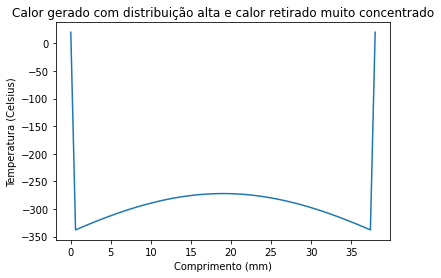

In [ ]:
X = nos_splines(n,L) # Lista de nós

(a,b,c,d) = matriz_ritzRaleigh_calor(X,k,n,L,f) # Elementos do sistema linear

alpha = sys_tridiagonal(a,b,c,d) # Coeficientes

Y = solucao_elementosFinitos_calor(n,alpha,X,A,B) # Solução u(x)

plt.plot(X,Y)
plt.title('Calor gerado com distribuição alta e calor retirado muito concentrado')
plt.xlabel('Comprimento (mm)')
plt.ylabel('Temperatura (Celsius)')

In [ ]:
# Caso 8: Calor Gerado: Distribuição Alta  
#         Calor Retirado: Distribuição Média 

QZERO_POS = 0.00159 # Calor máximo gerado
QZERO_NEG = 0.00372 # Resfriamento máximo
L = 38 # Comprimento (mm)
sigma = 20 # Constante de variação do calor
theta = 7 # Constante de variação do resfriamento

k = lambda x: 0.0036 # W/(mmK)

QPOS = lambda x: QZERO_POS * math.exp(-(x-L/2)**2/(sigma)**2) # Função do calor gerado

QNEG = lambda x: QZERO_NEG * (math.exp(-(x)**2/(theta)**2)+math.exp(-(x-L)**2/(theta)**2)) 
# Função do resfriamento

f = lambda x: QPOS(x) - QNEG(x) # Função do calor

# Condições de fronteira
A = 20
B = 20

n = 63 # n+2 nós

Text(0, 0.5, 'Temperatura (Celsius)')

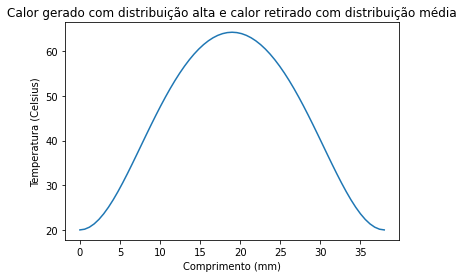

In [ ]:
X = nos_splines(n,L) # Lista de nós

(a,b,c,d) = matriz_ritzRaleigh_calor(X,k,n,L,f) # Elementos do sistema linear

alpha = sys_tridiagonal(a,b,c,d) # Coeficientes

Y = solucao_elementosFinitos_calor(n,alpha,X,A,B) # Solução u(x)

plt.plot(X,Y)
plt.title('Calor gerado com distribuição alta e calor retirado com distribuição média')
plt.xlabel('Comprimento (mm)')
plt.ylabel('Temperatura (Celsius)')

In [ ]:
# Caso 9: Calor Gerado: Distribuição Alta  
#         Calor Retirado: Distribuição Alta

QZERO_POS = 0.00159 # Calor máximo gerado
QZERO_NEG = 0.001313 # Resfriamento máximo
L = 38 # Comprimento (mm)
sigma = 20 # Constante de variação do calor
theta = 20 # Constante de variação do resfriamento

k = lambda x: 0.0036 # W/(mmK)

QPOS = lambda x: QZERO_POS * math.exp(-(x-L/2)**2/(sigma)**2) # Função do calor gerado

QNEG = lambda x: QZERO_NEG * (math.exp(-(x)**2/(theta)**2)+math.exp(-(x-L)**2/(theta)**2)) 
# Função do resfriamento

f = lambda x: QPOS(x) - QNEG(x) # Função do calor

# Condições de fronteira
A = 20
B = 20

n = 63 # n+2 nós

Text(0, 0.5, 'Temperatura (Celsius)')

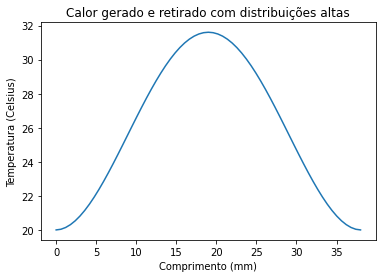

In [ ]:
X = nos_splines(n,L) # Lista de nós

(a,b,c,d) = matriz_ritzRaleigh_calor(X,k,n,L,f) # Elementos do sistema linear

alpha = sys_tridiagonal(a,b,c,d) # Coeficientes

Y = solucao_elementosFinitos_calor(n,alpha,X,A,B) # Solução u(x)

plt.plot(X,Y)
plt.title('Calor gerado e retirado com distribuições altas')
plt.xlabel('Comprimento (mm)')
plt.ylabel('Temperatura (Celsius)')

Verifica-se ainda que nos casos 4 e 7, nos quais o resfriamento é concentrado nas extremidades, a temperatura atinge valores muito baixos e não configura um modelo adequado, já que os altos valores de resfriamento concentrados nas extremidades são conduzidos pelo silício e reduzem drasticamente a temperatura em todo o comprimento. 

Além disso, constata-se que o caso 9, em que o calor gerado e o retirado são muito distribuídos, as temperaturas atingidas são as menores e apresenta a curva mais achatada.

Ainda assim, estamos considerando o calor retirado como igual ao calor gerado no sistema. Devemos então analisar o que ocorre se aumentassemos em 2 vezes o calor retirado em relação ao calor gerado, analisaremos sobre os casos 8 e 9 que são os mais apropriados.

In [ ]:
# Resfriamento 2 vezes maior que o Calor gerado (Q_ = 0,0924)
# Distribuição Média
QZERO_NEG = 0.00745
L = 38 # mm
theta = 7
QNEG = lambda x: QZERO_NEG * (math.exp(-(x)**2/(theta)**2) + math.exp(-(x-L)**2/(theta)**2))

In [ ]:
integrate_gaussian(10,QNEG,0,L) # Calor total retirado W/mm^3

0.09243359484753988

Text(0, 0.5, 'Calor Retirado (W/mm^3)')

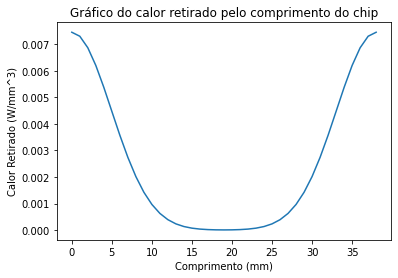

In [ ]:
# Gráfico do calor retirado pelo comprimento do chip
x=[] # Comprimento
y=[] # Calor

for i in range(0,int(L)+1):
  x.append(i)
  y.append(QNEG(x[i]))

plt.plot(x,y)
plt.title('Gráfico do calor retirado pelo comprimento do chip')
plt.xlabel('Comprimento (mm)')
plt.ylabel('Calor Retirado (W/mm^3)')

In [ ]:
# Calor Gerado: Distribuição Alta  
# Calor Retirado: Distribuição Média 

QZERO_POS = 0.00159 # Calor máximo gerado
QZERO_NEG = 0.00745 # Resfriamento máximo
L = 38 # Comprimento (mm)
sigma = 20 # Constante de variação do calor
theta = 7 # Constante de variação do resfriamento

k = lambda x: 0.0036 # W/(mmK)

QPOS = lambda x: QZERO_POS * math.exp(-(x-L/2)**2/(sigma)**2) # Função do calor gerado

QNEG = lambda x: QZERO_NEG * (math.exp(-(x)**2/(theta)**2)+math.exp(-(x-L)**2/(theta)**2)) 
# Função do resfriamento

f = lambda x: QPOS(x) - QNEG(x) # Função do calor

# Condições de fronteira
A = 20
B = 20

n = 63

Text(0, 0.5, 'Temperatura (Celsius)')

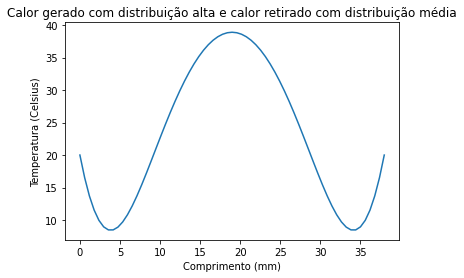

In [ ]:
X = nos_splines(n,L) # Lista de nós

(a,b,c,d) = matriz_ritzRaleigh_calor(X,k,n,L,f) # Elementos do sistema linear

alpha = sys_tridiagonal(a,b,c,d) # Coeficientes

Y = solucao_elementosFinitos_calor(n,alpha,X,A,B) # Solução u(x)

plt.plot(X,Y)
plt.title('Calor gerado com distribuição alta e calor retirado com distribuição média')
plt.xlabel('Comprimento (mm)')
plt.ylabel('Temperatura (Celsius)')

In [ ]:
# Resfriamento 2 vezes maior que o Calor gerado (Q_ = 0,0924)
# Distribuição Alta
QZERO_NEG = 0.001876
L = 38 # mm
theta = 30
QNEG = lambda x: QZERO_NEG * (math.exp(-(x)**2/(theta)**2) + math.exp(-(x-L)**2/(theta)**2))

In [ ]:
integrate_gaussian(10,QNEG,0,L) # Calor total retirado W/mm^3

0.09244782101161375

Text(0, 0.5, 'Calor Retirado (W/mm^3)')

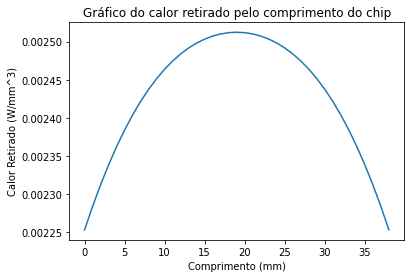

In [ ]:
# Gráfico do calor retirado pelo comprimento do chip
x=[] # Comprimento
y=[] # Calor

for i in range(0,int(L)+1):
  x.append(i)
  y.append(QNEG(x[i]))

plt.plot(x,y)
plt.title('Gráfico do calor retirado pelo comprimento do chip')
plt.xlabel('Comprimento (mm)')
plt.ylabel('Calor Retirado (W/mm^3)')

In [ ]:
# Calor Gerado: Distribuição Alta  
# Calor Retirado: Distribuição Alta

QZERO_POS = 0.00159 # Calor máximo gerado
QZERO_NEG = 0.001876 # Resfriamento máximo
L = 38 # Comprimento (mm)
sigma = 20 # Constante de variação do calor
theta = 30 # Constante de variação do resfriamento

k = lambda x: 0.0036 # W/(mmK)

QPOS = lambda x: QZERO_POS * math.exp(-(x-L/2)**2/(sigma)**2) # Função do calor gerado

QNEG = lambda x: QZERO_NEG * (math.exp(-(x)**2/(theta)**2)+math.exp(-(x-L)**2/(theta)**2)) 
# Função do resfriamento

f = lambda x: QPOS(x) - QNEG(x) # Função do calor

# Condições de fronteira
A = 20
B = 20

n = 63 # n+2 nós

Text(0, 0.5, 'Temperatura (Celsius)')

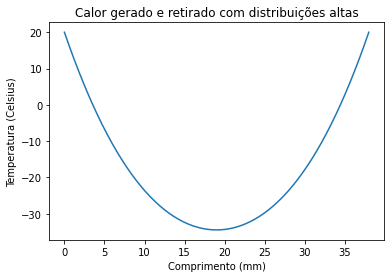

In [ ]:
X = nos_splines(n,L) # Lista de nós

(a,b,c,d) = matriz_ritzRaleigh_calor(X,k,n,L,f) # Elementos do sistema linear

alpha = sys_tridiagonal(a,b,c,d) # Coeficientes

Y = solucao_elementosFinitos_calor(n,alpha,X,A,B) # Solução u(x)

plt.plot(X,Y)
plt.title('Calor gerado e retirado com distribuições altas')
plt.xlabel('Comprimento (mm)')
plt.ylabel('Temperatura (Celsius)')

Observa-se que aumentar o calor retirado em relação ao gerado é mais apropriado para o caso em que o resfriamento possui distribuição média, pois mantém níveis de temperatura adequados entre 0 e 40 graus.

Já para o caso com resfriamento bem distribuído, as temperaturas chegam a níveis muito baixos da ordem de -30.

E se aumentarmos o calor gerado 2 vezes em relação ao resfriamento?

In [ ]:
# Calor gerado 2 vezes maior que o resfriamento (Q+ = 0,0924)
# Calor Gerado: Distribuição Alta

QZERO_POS = 0.003176
sigma = 20
L = 38 # mm
QPOS = lambda x: QZERO_POS * math.exp(-(x-(L/2))**2/(sigma)**2)

In [ ]:
integrate_gaussian(10,QPOS,0,L) # Calor total retirado W/mm^3

0.09242103292674225

Text(0, 0.5, 'Calor Gerado (W/mm^3)')

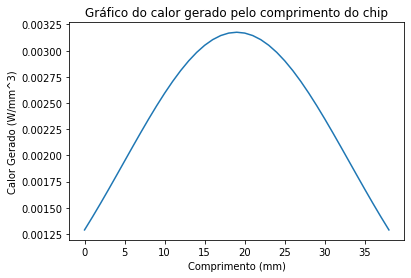

In [ ]:
# Gráfico do calor gerado pelo comprimento do chip
x=[] # Comprimento
y=[] # Calor

for i in range(0,int(L)+1):
  x.append(i)
  y.append(QPOS(x[i]))

plt.plot(x,y)
plt.title('Gráfico do calor gerado pelo comprimento do chip')
plt.xlabel('Comprimento (mm)')
plt.ylabel('Calor Gerado (W/mm^3)')

In [ ]:
# Calor Gerado: Distribuição Alta  
# Calor Retirado: Distribuição Média 

QZERO_POS = 0.003176 # Calor máximo gerado
QZERO_NEG = 0.00372 # Resfriamento máximo
L = 38 # Comprimento (mm)
sigma = 20 # Constante de variação do calor
theta = 7 # Constante de variação do resfriamento

k = lambda x: 0.0036 # W/(mmK)

QPOS = lambda x: QZERO_POS * math.exp(-(x-L/2)**2/(sigma)**2) # Função do calor gerado

QNEG = lambda x: QZERO_NEG * (math.exp(-(x)**2/(theta)**2)+math.exp(-(x-L)**2/(theta)**2)) 
# Função do resfriamento

f = lambda x: QPOS(x) - QNEG(x) # Função do calor

# Condições de fronteira
A = 20
B = 20

n = 63 # n+2 nós

Text(0, 0.5, 'Temperatura (Celsius)')

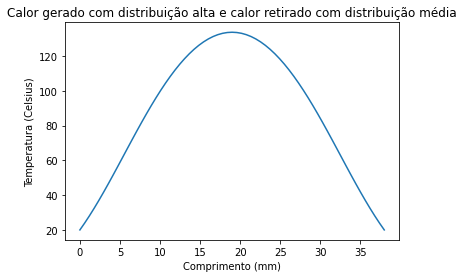

In [ ]:
X = nos_splines(n,L) # Lista de nós

(a,b,c,d) = matriz_ritzRaleigh_calor(X,k,n,L,f) # Elementos do sistema linear

alpha = sys_tridiagonal(a,b,c,d) # Coeficientes

Y = solucao_elementosFinitos_calor(n,alpha,X,A,B) # Solução u(x)

plt.plot(X,Y)
plt.title('Calor gerado com distribuição alta e calor retirado com distribuição média')
plt.xlabel('Comprimento (mm)')
plt.ylabel('Temperatura (Celsius)')

In [ ]:
# Calor Gerado: Distribuição Alta  
# Calor Retirado: Distribuição Alta 

QZERO_POS = 0.003176 # Calor máximo gerado
QZERO_NEG = 0.001313 # Resfriamento máximo
L = 38 # Comprimento (mm)
sigma = 20 # Constante de variação do calor
theta = 20 # Constante de variação do resfriamento

k = lambda x: 0.0036 # W/(mmK)

QPOS = lambda x: QZERO_POS * math.exp(-(x-L/2)**2/(sigma)**2) # Função do calor gerado

QNEG = lambda x: QZERO_NEG * (math.exp(-(x)**2/(theta)**2)+math.exp(-(x-L)**2/(theta)**2)) 
# Função do resfriamento

f = lambda x: QPOS(x) - QNEG(x) # Função do calor

# Condições de fronteira
A = 20
B = 20

n = 63 # n+2 nós

Text(0, 0.5, 'Temperatura (Celsius)')

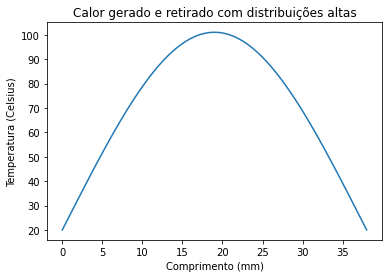

In [ ]:
X = nos_splines(n,L) # Lista de nós

(a,b,c,d) = matriz_ritzRaleigh_calor(X,k,n,L,f) # Elementos do sistema linear

alpha = sys_tridiagonal(a,b,c,d) # Coeficientes

Y = solucao_elementosFinitos_calor(n,alpha,X,A,B) # Solução u(x)

plt.plot(X,Y)
plt.title('Calor gerado e retirado com distribuições altas')
plt.xlabel('Comprimento (mm)')
plt.ylabel('Temperatura (Celsius)')

Nota-se que há apenas o aumento das temperaturas com o calor gerado maior que o resfriamento, assim como há a diminuição das mesmas para o inverso.

##Equilíbrio com variação de material

Podemos também verificar como o material k(x) influencia sobre a difusão térmica. Primeiramente será adotado o silício (k(x) = 3,6 W/(mK)) como o único material do chip. Depois iremos considerar outro material envolto do silício, dessa maneira k varia dependendo de x. Por exemplo, podemos considerar o silício $k_s$ envolto de alumínio $k_a$ ($k_a$ = 60 W/mk):

\begin{align}
        k(x) = \left\{
        \begin{array}{cl}
        k_s, \ \text{se x ∈ (L/2 -d, L/2+d)} \\
        k_a, \ \text{caso contrário} \\
        \end{array}
        \right.
\end{align}

sendo d as distâncias dos extremos até o começo da composição por silício.

##### Para considerar o equílibrio com variação do material, foi necessário alterar os códigos dispostos anteriormente em alguns pontos específícos que serão demonstrados a seguir. No código abaixo, a alteração realizada está contida no interior do laço for, que agora define as integral considerando um coeficiente de condutibilidade térmica diferente para cada ponto do chip, tendo os pontos centrais recebendo um dos coeficientes e os pontos da extremidade recebendo o outro coeficiente. Além disso, é necessário determinar uma constante D, que impõe os pontos do comprimento, a partir de onde os coeficientes de condutibilidade térmica são alterados.

In [ ]:
def matriz_ritzRaleigh_calor_k_variavel(X,K,n,L,f,D): # Cálculo dos elementos do sistema linear tridiagonal
                                                      # no método Ritz-Raleigh com 2 valores para k
  h=L/(n+1) # Espaçamento entre os nós

  a = [] # Lista dos elementos da diagonal esquerda da matriz A
  b = [] # Lista dos elementos da diagonal principal da matriz A
  c = [] # Lista dos elementos da diagonal direita da matriz A
  d = [] # Lista dos elementos do vetor d

  ks=lambda x: K[0] # Coeficiente de condutibilidade térmica central
  ka=lambda x: K[1] # Coeficiente de condutibilidade térmica periférico

  dist1 = ((L/2)-D) # Ponto de troca de material a esquerda do centro
  dist2 = ((L/2)+D) # Ponto de troca de material a direita do centro

  for i in range(1,n+1): # Passa por todos os nós não extremos
    if ((X[i+1])<(dist1)) or ((X[i])>(dist2)): 
      INT_XPOS = integrate_gaussian(10,ks,X[i],X[i+1]) # Integra a função k 
      #entre o nó e o próximo nó
    else:
      INT_XPOS = integrate_gaussian(10,ka,X[i],X[i+1]) # Integra a função k 
      #entre o nó e o próximo nó
    if ((X[i])<(dist1)) or ((X[i-1])>(dist2)):
      INT_XNEG = integrate_gaussian(10,ks,X[i-1],X[i]) # Integra a função k 
      #entre o nó e o nó anterior
    else:
      INT_XNEG = integrate_gaussian(10,ka,X[i-1],X[i]) # Integra a função k 
      #entre o nó e o nó anterior

    b_i = (1/h)**2 * INT_XNEG + (1/h)**2 * INT_XPOS # Calcula os elementos 
    #da diagonal principal

    c_i = -(1/h)**2 * INT_XPOS # Calcula os elementos da diagonal direita

    a_i = -(1/h)**2 * INT_XNEG # Calcula os elementos da diagonal esquerda

    a.append(a_i)
    b.append(b_i)
    c.append(c_i)
    G = lambda x: (x-X[i-1])*f(x) # Multiplica a função f(x) pela 
    #função chapéu em [X[i-1],X[i]]
    H = lambda x: (X[i+1]-x)*f(x) # Multiplica a função f(x) pela 
    #função chapéu em [X[i],X[i+1]]
    INT_G = integrate_gaussian(10,G,X[i-1],X[i])  # Integra a 
    #função declarada em [X[i-1],X[i]]
    INT_H = integrate_gaussian(10,H,X[i],X[i+1]) # Integra a 
    #função declarada em [X[i],X[i+1]]
    d_i = 1/h * INT_G  + 1/h * INT_H  # Calcula os elementos do vetor d

    d.append(d_i)

  # Extremos requerido para a função sys_tridiagonal
  a[0]=0
  c[n-1]=0

  # Transforma as listas em arrays
  a = np.array(a)
  b = np.array(b)
  c = np.array(c)
  d = np.array(d)

  return a,b,c,d # Retorna os vetores que compõe o sistema linear

##### Feitas as alterações no código descritas acima, faz-se necessário determinar as constantes e funções que serão utilizadas nos cálculos. Para isso, utiliza-se uma lista K, que contém os dois coeficientes a serem utililizados, sendo o coeficiente dos extremos o primeiro item da lista e o coeficiente do centro, o segundo item da lista. Além disso, foi considerada distância D do centro do chip para o ponto em que os materiais se alteram, além disso a função f(x), n, L e as condições de fronteira homogêneas correspondem às mesmas utilizadas no primeiro teste de validação.

In [ ]:
#Valores de Validação
K = [60, 3.6]
D=0.25
f = lambda x: ((12*x*(1-x))-2)
A=0
B=0
n = 63
L=1.0

##### A etapa de validação dessas alterações corresponde às mesmas mencionadas nos testes realizados anteriormente, ela é responsável por chamar as funções necessárias e fornecer a solução necessária para construção do gráfico de forma que seja possível observar as alterações que ocorreram devido às novas condições impostas.

Text(0, 0.5, 'Variação da Temperatura (Celsius)')

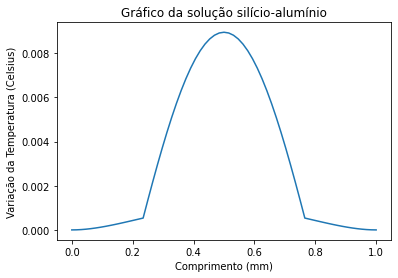

In [ ]:
#Validação
X = nos_splines(n,L) # Lista de nós

(a,b,c,d) = matriz_ritzRaleigh_calor_k_variavel(X,K,n,L,f,D) # Elementos do sistema linear

alpha = sys_tridiagonal(a,b,c,d) # Coeficientes

Y = solucao_elementosFinitos_calor(n,alpha,X,A,B) # Solução u(x)

plt.plot(X,Y)
plt.title('Gráfico da solução silício-alumínio')
plt.xlabel('Comprimento (mm)')
plt.ylabel('Variação da Temperatura (Celsius)')

##### O gráfico obtido nessa etapa, utilizou de alguns dos mesmos parâmetros do primeiro teste da etapa de validação, portanto, o utilizaremos como parâmetro de comparação. Tendo em vista, que os parâmetros alterados foram apenas a implementação de um segundo material no chip, podemos observar que o centro do gráfico possuí um desempenho muito similar com o apresentado para o visualizado no primeiro teste de validação, devido a similiridade dos parâmetros empregados. Já nos extremos do gráfico, temos um coeficiente de condutibilidade térmica maior, que corresponde ao do alumínio e portanto, a temperatura nesses pontos mais periféricos decresce mais vagarosamente.

##### Para efeitos de comparação, atualmente é podemos encontrar o alumínio sendo substituído por outros materiais que possuem propriedades também adequadas para a dissipação de calor. Esse é o caso do polímero PPS - sulfeto de p-fenileno, esse material tem como principal vantagem a massa específica, cerca de 50% menor do que aquela encontrada no alumínio, apesar disso possuí condutibilidade térmica inferior a aquela encontrada no material metálico, sendo 25W/mK contra 60W/mK do alumínio.

In [ ]:
#Valores de Validação
K = [25, 3.6]
D=0.25
f = lambda x: ((12*x*(1-x))-2)
A=0
B=0
n = 63
L=1.0

##### Tendo em vista tamanha diferença, será aplicada uma análise similar a realizada com o alumínio, para que seja possível compreender como esse material atua na dissipação de calor, caso aplicado nas extremidades do chip. Essa análise contribuí do ponto de vista prático para observar se a substituição dos materiais terá a aplicação no componente eletrônico viabilizada ou não.

Text(0, 0.5, 'Variação da Temperatura (Celsius)')

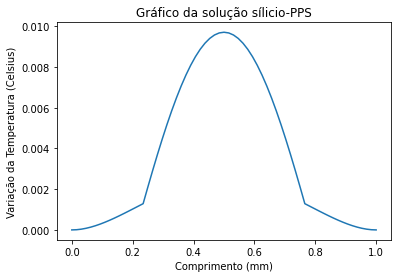

In [ ]:
#Validação
X = nos_splines(n,L) # Lista de nós

(a,b,c,d) = matriz_ritzRaleigh_calor_k_variavel(X,K,n,L,f,D) # Elementos do sistema linear

alpha = sys_tridiagonal(a,b,c,d) # Coeficientes

Y = solucao_elementosFinitos_calor(n,alpha,X,A,B) # Solução u(x)

plt.plot(X,Y)
plt.title('Gráfico da solução sílicio-PPS')
plt.xlabel('Comprimento (mm)')
plt.ylabel('Variação da Temperatura (Celsius)')

##### Com o resultado apresentado no gráfico acima, podemos observar que a diferença se encontra principalmente na iminência da fronteira entre materiais, que apresenta uma temperatura mais alta do que o alumínio, sendo assim necessário que ocorra um decaimento mais rápido até as extremidades do tipo, nesse aspecto podemos observar que as derivadas nas extremidades do gráfico são maiores para o PPS do que para o alumínio. Tendo em vista a pequena variação, de temperatura da troca dos materiais, podemos concluir que sua utilização se tornaria viável, visto que o polímero possuí vantagens como a massa específica menor.

## Conclusões
##### Tendo em vista todo o desenvolvimento realizado no decorrer do relatório, podemos subdividi-los em três diferentes etapas, inicialmente foi utilizado embasamento teórico, tanto na confecção dos exercícios práticos que antecedem e integram o atual, como no desenvolvimento da Tarefa 3. 
#####Os conteúdos aplicados propriamente ditos nessa tarefa, consiste na utilização de conceitos de splines lineares, método de Ritz-Raleigh para aproximação, assim como conteúdos mais indiretos à disciplina de Métodos Numéricos, como conceitos de transferência de calor e elementos finitos.
#####A segunda etapa dessa tarefa consiste no desenvolvimento do código, aplicando os conceitos absorvidos anteriormente. Essa etapa consistiu no embasamento do desenvolvimento proposto no enunciado do exercício prático 3, tendo como forma de analisar a eficácia do código através de testes que deveriam ser realizados e precisam retornar uma solução condizente com a proposta.
#####Sendo assim, é possível partir para a última etapa do desenvolvimento que consistiu na análise e comparação de resultados com valores de referência, como foi o caso das soluções exatas fornecidas para os testes. Essa etapa tem dois principais objetivos, o primeiro é verificar o funcionamento do código, atestando sua usabilidade ou não e com isso fornecendo uma justificativa plausível para os resultados obtidos com base no conteúdo teórico que compõe a primeira etapa do desenvolvimento.
#####Concluídas todas as etapas propostas é possível verificar a atuação eficaz do código para resolver os problemas sugeridos, além disso identificar de forma qualitativa sua eficiência condizente com o esperado, visto que evitou-se a utilização de ferramentas no código que aumentem sua complexidade, como por exemplo o uso de matrizes. Assim, podemos concluir que o presente relatório cumpre com as etapas propostas e fornece um código eficaz e eficiente para as aplicações propostas.